In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.ensemble import IsolationForest





In [2]:
data=pd.read_csv('data4.csv')

In [3]:
data.shape

(2509, 34)

In [4]:
data.head()

Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0000             75.65             Mastectomy  Breast Cancer   
1    MB-0002             43.19      Breast Conserving  Breast Cancer   
2    MB-0005             48.87             Mastectomy  Breast Cancer   
3    MB-0006             47.68             Mastectomy  Breast Cancer   
4    MB-0008             76.97             Mastectomy  Breast Cancer   

                        Cancer Type Detailed Cellularity Chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN           No   
1           Breast Invasive Ductal Carcinoma        High           No   
2           Breast Invasive Ductal Carcinoma        High          Yes   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
4  Breast Mixed Ductal and Lobular Carcinoma        High          Yes   

  Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
0                 claudin-low     1.0                   Positve  ...   
1                        LumA     1.0                   Positve  ...   
2                        LumB     1.0                   Positve  ...   
3                        LumB     1.0                   Positve  ...   
4                        LumB     1.0                   Positve  ...   

  Overall Survival Status  PR Status Radio Therapy  \
0                  Living   Negative           Yes   
1                  Living   Positive           Yes   
2                Deceased   Positive            No   
3                  Living   Positive           Yes   
4                Deceased   Positive           Yes   

  Relapse Free Status (Months) Relapse Free Status     Sex  \
0                       138.65        Not Recurred  Female   
1                        83.52        Not Recurred  Female   
2                       151.28            Recurred  Female   
3                       162.76        Not Recurred  Female   
4                        18.55            Recurred  Female   

  3-Gene classifier subtype Tumor Size Tumor Stage  Patient's Vital Status  
0                 ER-/HER2-       22.0         2.0                  Living  
1     ER+/HER2- High Prolif       10.0         1.0                  Living  
2                       NaN       15.0         2.0         Died of Disease  
3                       NaN       25.0         2.0                  Living  
4     ER+/HER2- High Prolif       40.0         2.0         Died of Disease  

[5 rows x 34 columns]

#### Facem drop la coloana de ID, si cea de sex,deoarece nu poseda informatie importanta

In [5]:
data=data.drop(['Patient ID','Sex'],axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age at Diagnosis                2498 non-null   float64
 1   Type of Breast Surgery          1955 non-null   object 
 2   Cancer Type                     2509 non-null   object 
 3   Cancer Type Detailed            2509 non-null   object 
 4   Cellularity                     1917 non-null   object 
 5   Chemotherapy                    1980 non-null   object 
 6   Pam50 + Claudin-low subtype     1980 non-null   object 
 7   Cohort                          2498 non-null   float64
 8   ER status measured by IHC       2426 non-null   object 
 9   ER Status                       2469 non-null   object 
 10  Neoplasm Histologic Grade       2388 non-null   float64
 11  HER2 status measured by SNP6    1980 non-null   object 
 12  HER2 Status                     19

#### Observam un numar destul de mare de date lipsa

#### Redenumim coloanele pentru a putea lucra mai usor cu ele

In [7]:
data.rename(columns ={'Age at Diagnosis':'diag_age', 'Type of Breast Surgery':'surg_type', 'Cancer Type':'cancer_type',
       'Cancer Type Detailed':'cancer_type_details', 'Cellularity':'cellularity', 'Chemotherapy':'chemotherapy',
       'Pam50 + Claudin-low subtype':'claudin-low_subtype', 'Cohort':'cohort', 'ER status measured by IHC':'ihc_er_status',
       'ER Status':'er_status', 'Neoplasm Histologic Grade':'neoplasm_gr',
       'HER2 status measured by SNP6':'her2_snp6', 'HER2 Status':'her2_status',
       'Tumor Other Histologic Subtype':'othr_histologic_sbt', 'Hormone Therapy':'hormone_thrp',
       'Inferred Menopausal State':'menopausal_state', 'Integrative Cluster':'integrative_cluster',
       'Primary Tumor Laterality':'prim_tmr_ltrl', 'Lymph nodes examined positive':'pos_lymph_nodes',
       'Mutation Count':'mut_count', 'Nottingham prognostic index':'nothing_progn_id', 'Oncotree Code':'oncotree_code',
       'Overall Survival (Months)':'overall_surv_m', 'Overall Survival Status':'overall_surv_stat', 'PR Status':'pr_status',
       'Radio Therapy':'radio_thrp', 'Relapse Free Status (Months)':'relapse_free_status_months', 'Relapse Free Status':'relapse_free_status',
       '3-Gene classifier subtype':'3gene_class_sbtype', 'Tumor Size':'tum_size', 'Tumor Stage':'tum_stage',
       'Patient\'s Vital Status':'pat_vit_status'}, inplace = True)

In [8]:
data.columns

Index(['diag_age', 'surg_type', 'cancer_type', 'cancer_type_details',
       'cellularity', 'chemotherapy', 'claudin-low_subtype', 'cohort',
       'ihc_er_status', 'er_status', 'neoplasm_gr', 'her2_snp6', 'her2_status',
       'othr_histologic_sbt', 'hormone_thrp', 'menopausal_state',
       'integrative_cluster', 'prim_tmr_ltrl', 'pos_lymph_nodes', 'mut_count',
       'nothing_progn_id', 'oncotree_code', 'overall_surv_m',
       'overall_surv_stat', 'pr_status', 'radio_thrp',
       'relapse_free_status_months', 'relapse_free_status',
       '3gene_class_sbtype', 'tum_size', 'tum_stage', 'pat_vit_status'],
      dtype='object')

### Observam ca majoritatea coloanelor sunt de tip object

In [9]:
data.select_dtypes(float).shape
    

(2509, 10)

### Din start observam o distribuire neuniforma

In [10]:
data['pat_vit_status'].value_counts()

Living                  837
Died of Disease         646
Died of Other Causes    497
Name: pat_vit_status, dtype: int64

#### Verificam cate date distincte avem in fiecare coloana

In [11]:
values=[]
minivalues=[]

columns=[]
minicolumns=[]
for column in data.columns:
    if np.count_nonzero(data[column].value_counts())<30:
        minicolumns.append(column)
        minivalues.append(np.count_nonzero(data[column].value_counts()))
    else:
        columns.append(column)
        values.append(np.count_nonzero(data[column].value_counts()))
        

In [12]:
object_values=[]
ob_coll=data.select_dtypes(object).columns
for column in ob_coll:
     object_values.append(np.count_nonzero(data[column].value_counts()))
    

### Numarul de date distincte in coloanele de tip object

<BarContainer object of 22 artists>

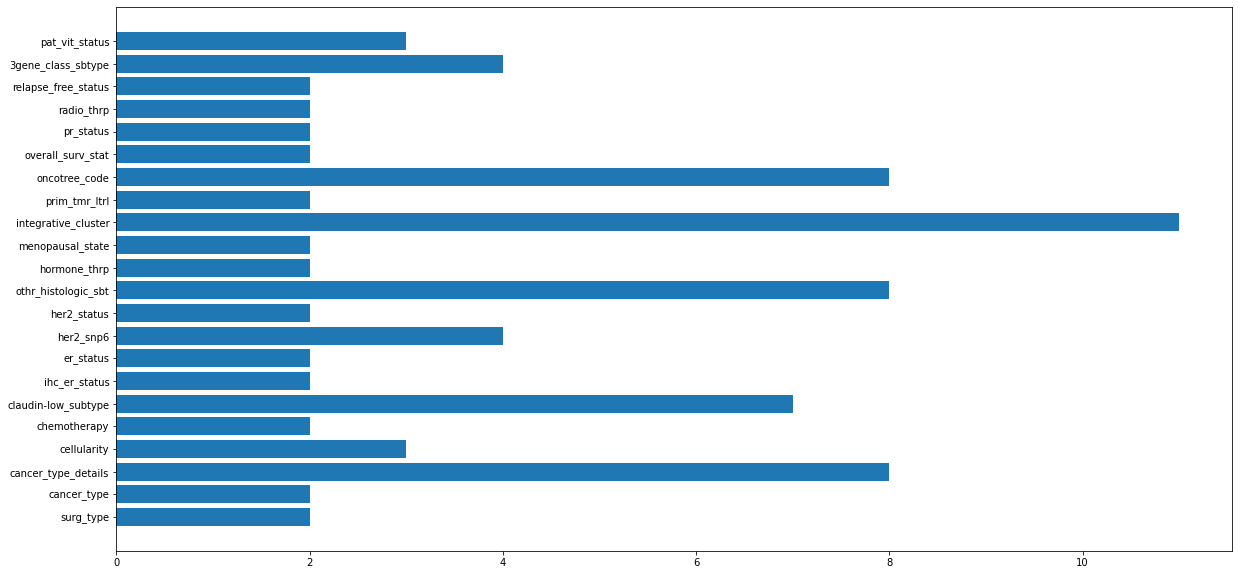

In [13]:
fig = plt.figure(figsize = (20,10))
plt.barh(ob_coll,object_values, label = 'values')

### Deoarece nu avem multe date distincte, voi folosi label encoder

<BarContainer object of 25 artists>

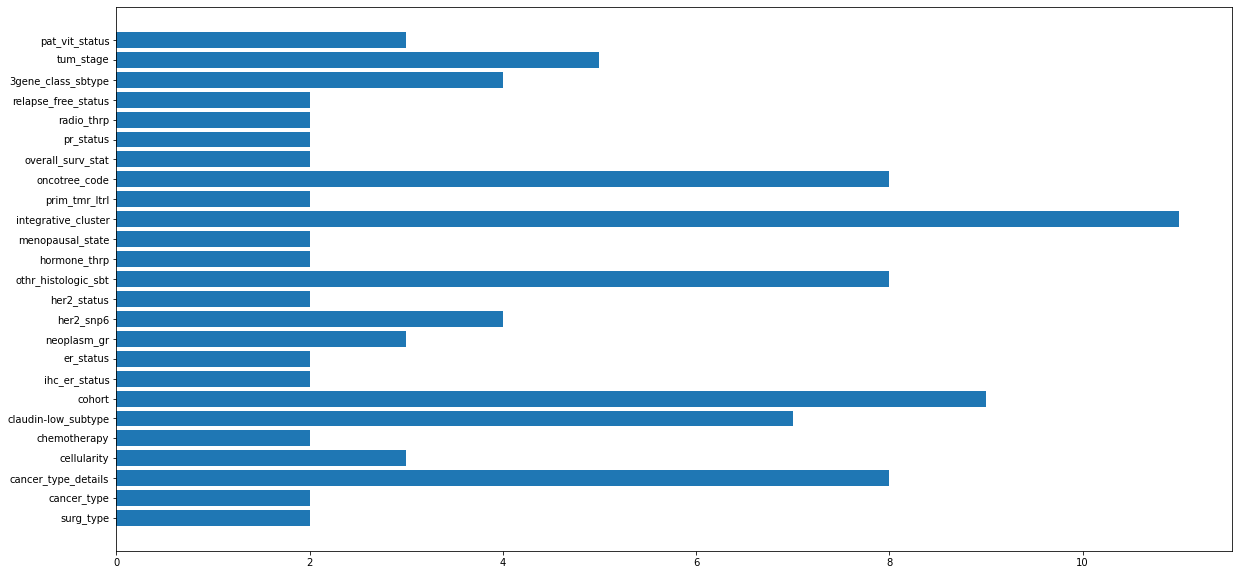

In [14]:
fig = plt.figure(figsize = (20,10))
plt.barh(minicolumns,minivalues, label = 'values')

<BarContainer object of 7 artists>

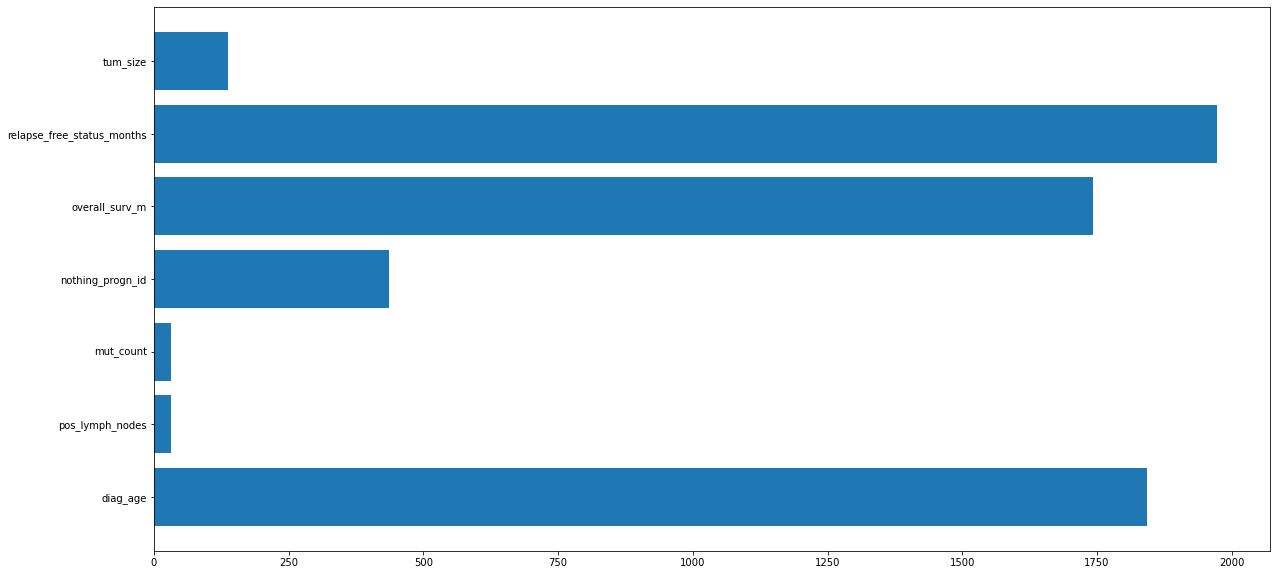

In [15]:
fig = plt.figure(figsize = (20,10))
plt.barh(columns,values, label = 'values')

### Observam ca coloanele care au numar mai mare de date distincte sunt cele de tip float

### Incepem lucrul cu datele nule

In [16]:
data.isnull().sum()

diag_age                       11
surg_type                     554
cancer_type                     0
cancer_type_details             0
cellularity                   592
chemotherapy                  529
claudin-low_subtype           529
cohort                         11
ihc_er_status                  83
er_status                      40
neoplasm_gr                   121
her2_snp6                     529
her2_status                   529
othr_histologic_sbt           135
hormone_thrp                  529
menopausal_state              529
integrative_cluster           529
prim_tmr_ltrl                 639
pos_lymph_nodes               266
mut_count                     152
nothing_progn_id              222
oncotree_code                   0
overall_surv_m                528
overall_surv_stat             528
pr_status                     529
radio_thrp                    529
relapse_free_status_months    121
relapse_free_status            21
3gene_class_sbtype            745
tum_size      

#### Un numar destul de mare in comparatie cu marimea datasetului

### Distributia datelor nule pe coloane in ordine crescatoare

<AxesSubplot:>

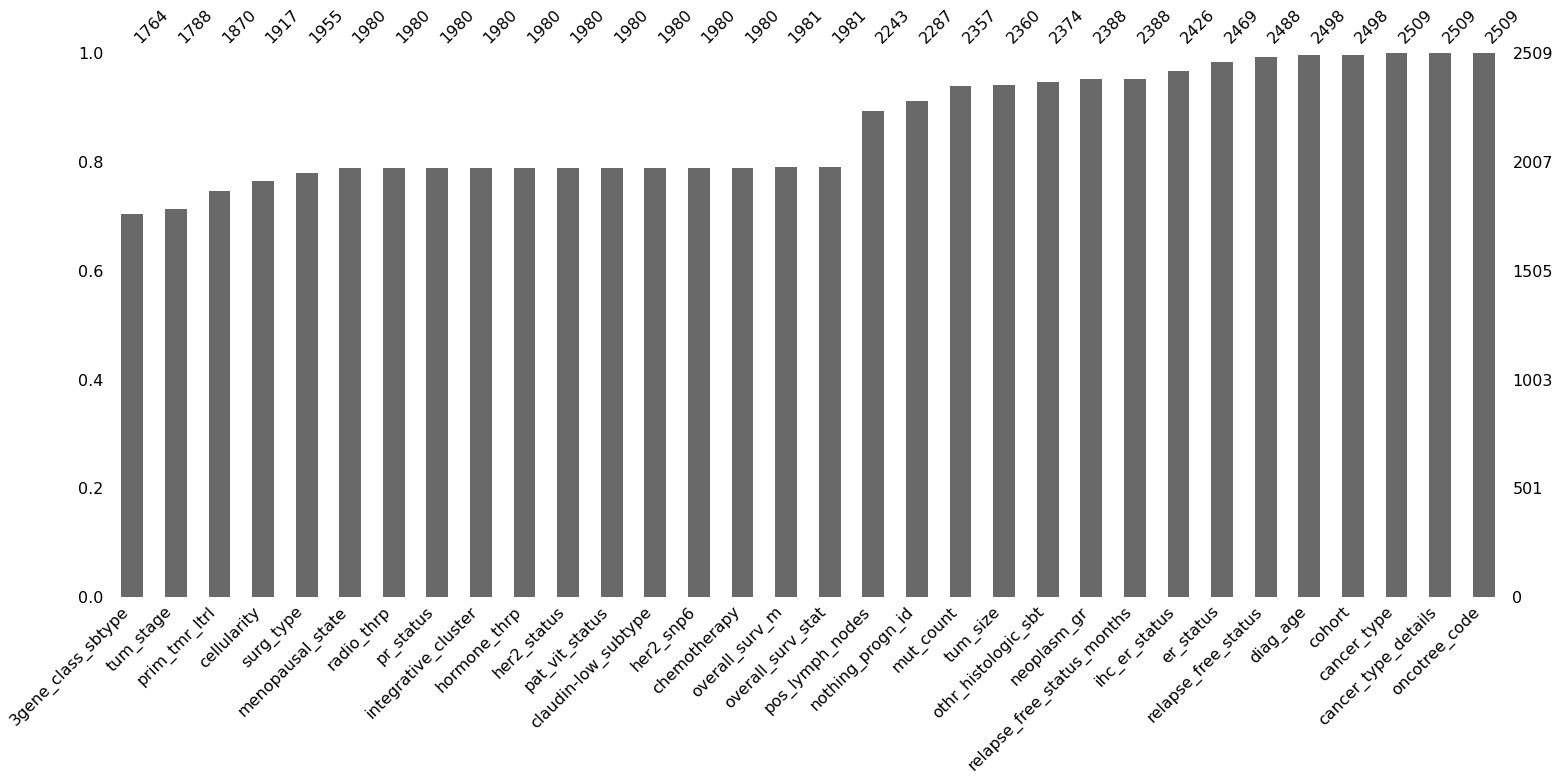

In [17]:
import missingno as msno
msno.bar(data,sort="ascending")

### Distributia datelor nule in fiecare coloana

<AxesSubplot:>

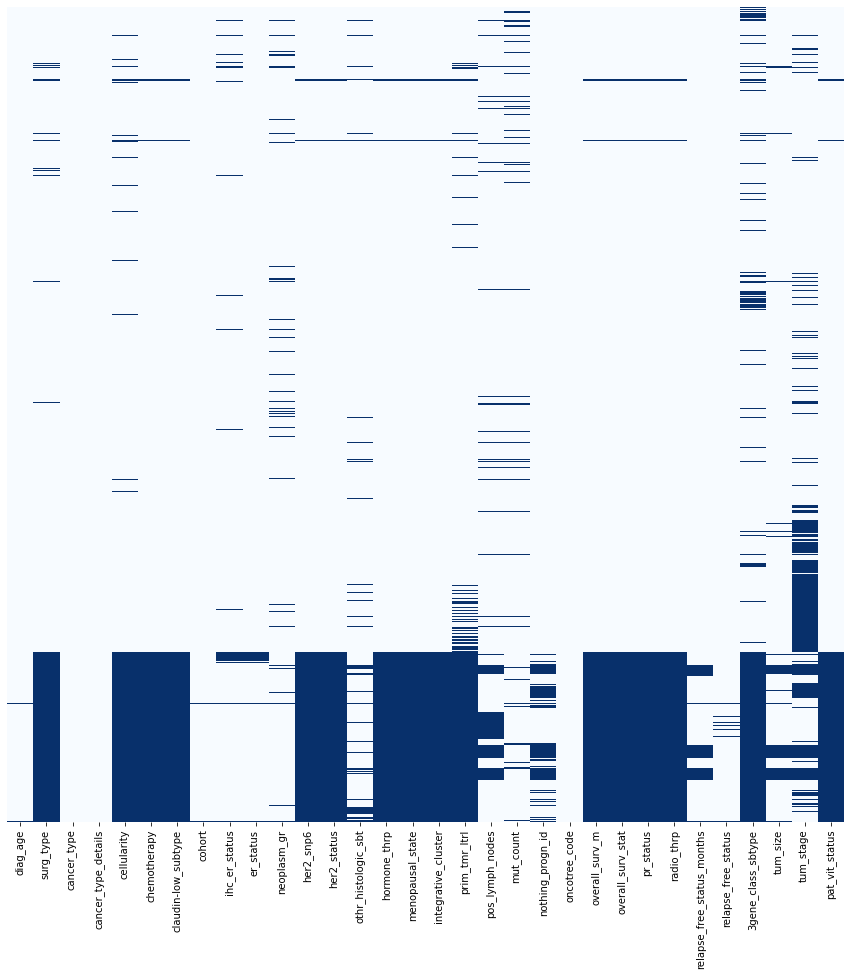

In [18]:
plt.figure(figsize=(15,15))
call=data.columns
sns.heatmap(data[call].isnull(),cmap='Blues',yticklabels=False,cbar=False)

### Nu este o imagine chiar placuta,dar continuam

### Inspectam coloanele care poseda un numar mare de date nule in acelasi intervale

In [19]:
data["surg_type"].value_counts()

Mastectomy           1170
Breast Conserving     785
Name: surg_type, dtype: int64

#### posibil ca valorile nule sa insemne ca nu a fost efectuata nici un tip de operatie,continuam observatiile

In [20]:
data["chemotherapy"].value_counts()

No     1568
Yes     412
Name: chemotherapy, dtype: int64

In [21]:
data["cellularity"].value_counts()

High        965
Moderate    737
Low         215
Name: cellularity, dtype: int64

In [22]:
data["claudin-low_subtype"].value_counts()

LumA           700
LumB           475
Her2           224
claudin-low    218
Basal          209
Normal         148
NC               6
Name: claudin-low_subtype, dtype: int64

In [23]:
data["her2_snp6"].value_counts()

Neutral    1436
Gain        438
Loss        101
Undef         5
Name: her2_snp6, dtype: int64

In [24]:
data["her2_status"].value_counts()

Negative    1733
Positive     247
Name: her2_status, dtype: int64

In [25]:
data["hormone_thrp"].value_counts()

Yes    1216
No      764
Name: hormone_thrp, dtype: int64

In [26]:
data["menopausal_state"].value_counts()

Post    1556
Pre      424
Name: menopausal_state, dtype: int64

In [27]:
data["integrative_cluster"].value_counts()

8       299
3       290
4ER+    260
10      226
7       190
5       190
9       146
1       139
6        85
4ER-     83
2        72
Name: integrative_cluster, dtype: int64

#### Dar deoarece lipsesc si datele din target column, vom separa datele,pentru ca in cazul inlocuirii datelor nule din target column, putem efectua greseli  care vor conduce la o antrenare rea

In [28]:
working_data=data.loc[~data['pat_vit_status'].isnull()]
null_target_data=data.loc[data['pat_vit_status'].isnull()]

In [29]:
working_data.count().sum()

62019

In [30]:
working_data.isnull().sum().sum()/working_data.count().sum()

0.021622406036859672

### 2% procente din date lipsesc
### distributia in fiecare coloana a datelor lipsa pentru datasetul de lucru

<AxesSubplot:>

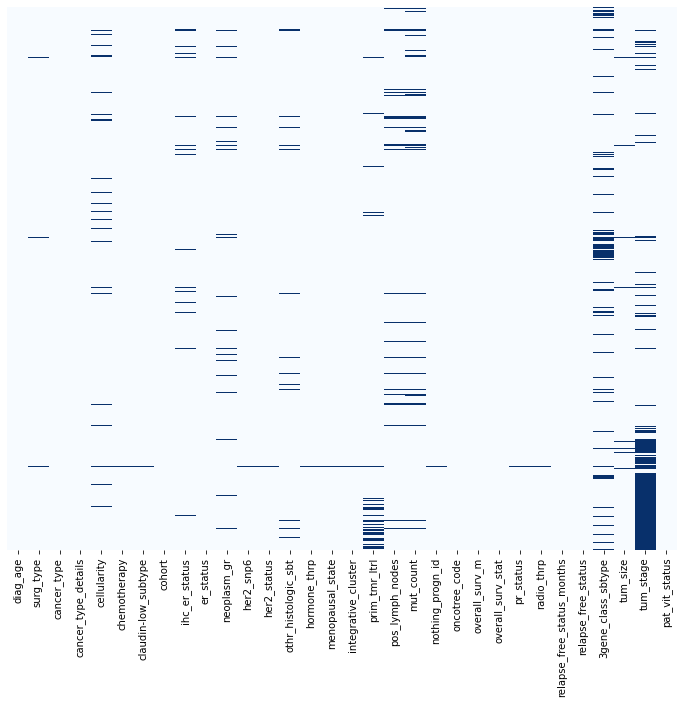

In [31]:
plt.figure(figsize=(12,10))
call=working_data.columns
sns.heatmap(working_data[call].isnull(),cmap='Blues',yticklabels=False,cbar=False)

### Situatia din datasetul unde targetul este null



<AxesSubplot:>

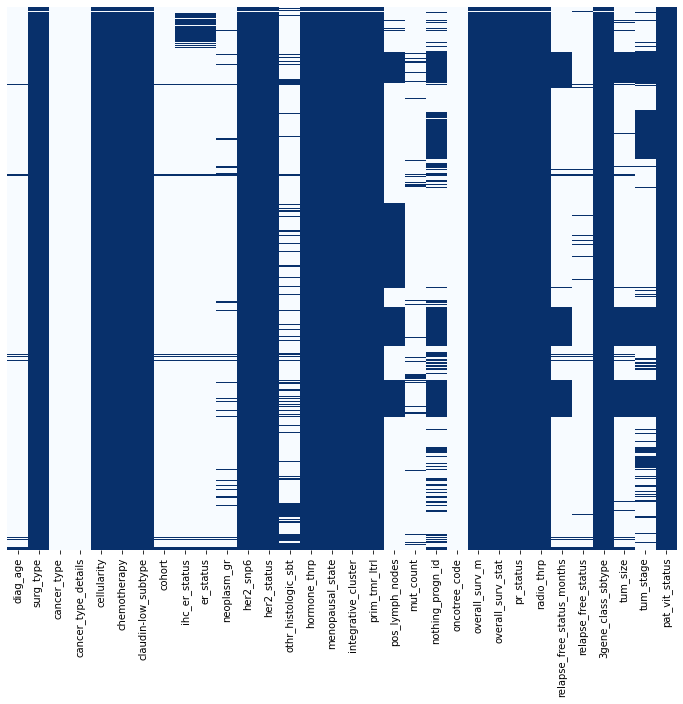

In [32]:
plt.figure(figsize=(12,10))
call=null_target_data.columns
sns.heatmap(null_target_data[call].isnull(),cmap='Blues',yticklabels=False,cbar=False)

#### Numarul de date lipsa in fiecare coloana

In [33]:
null_target_data.isnull().sum()

diag_age                       11
surg_type                     528
cancer_type                     0
cancer_type_details             0
cellularity                   528
chemotherapy                  528
claudin-low_subtype           528
cohort                         11
ihc_er_status                  40
er_status                      40
neoplasm_gr                    33
her2_snp6                     528
her2_status                   528
othr_histologic_sbt            91
hormone_thrp                  528
menopausal_state              528
integrative_cluster           528
prim_tmr_ltrl                 528
pos_lymph_nodes               190
mut_count                      31
nothing_progn_id              221
oncotree_code                   0
overall_surv_m                528
overall_surv_stat             528
pr_status                     528
radio_thrp                    528
relapse_free_status_months    121
relapse_free_status            21
3gene_class_sbtype            528
tum_size      

### Incepem transformarea datelor in valori numerice,pentru inceput selectam coloanele cu date de tip object


In [34]:
object_data=working_data.select_dtypes(object)

In [35]:
object_data.isnull().sum()

surg_type               26
cancer_type              0
cancer_type_details      0
cellularity             64
chemotherapy             1
claudin-low_subtype      1
ihc_er_status           43
er_status                0
her2_snp6                1
her2_status              1
othr_histologic_sbt     44
hormone_thrp             1
menopausal_state         1
integrative_cluster      1
prim_tmr_ltrl          111
oncotree_code            0
overall_surv_stat        0
pr_status                1
radio_thrp               1
relapse_free_status      0
3gene_class_sbtype     217
pat_vit_status           0
dtype: int64

### Deoarece aceste coloane nu contin multe date distincte folosim label encoder

In [36]:

lbl_enc=LabelEncoder()
original=object_data
mask=object_data.isnull()
object_data=object_data.astype(str).apply(lbl_enc.fit_transform)
object_data=object_data.where(~mask, original)

### deoarece nu putem face encoding la datele lipsa,pe ele le omitem

In [37]:
object_data.head()

surg_type  cancer_type  cancer_type_details cellularity chemotherapy  \
0         1            0                    2         NaN            0   
1         0            0                    2           0            0   
2         1            0                    2           0            1   
3         1            0                    5           2            1   
4         1            0                    5           0            1   

  claudin-low_subtype ihc_er_status  er_status her2_snp6 her2_status  ...  \
0                   6             1          1         2           0  ...   
1                   2             1          1         2           0  ...   
2                   3             1          1         2           0  ...   
3                   3             1          1         2           0  ...   
4                   3             1          1         2           0  ...   

  menopausal_state integrative_cluster prim_tmr_ltrl oncotree_code  \
0                0                   4             1             2   
1                1                   4             1             2   
2                1                   3             1             2   
3                1                  10             1             6   
4                0                  10             1             6   

  overall_surv_stat  pr_status  radio_thrp relapse_free_status  \
0                 1          0           1                   0   
1                 1          1           1                   0   
2                 0          1           0                   1   
3                 1          1           1                   0   
4                 0          1           1                   1   

  3gene_class_sbtype  pat_vit_status  
0                  2               2  
1                  0               2  
2                NaN               0  
3                NaN               2  
4                  0               0  

[5 rows x 22 columns]

### Parca totul arata bine la partea de encoding,acum concatenam datele care erau object cu cele float

In [38]:
num_data=pd.concat([object_data,working_data.select_dtypes(float)],axis=1)

In [39]:
num_data.head(10)

surg_type  cancer_type  cancer_type_details cellularity chemotherapy  \
0          1            0                    2         NaN            0   
1          0            0                    2           0            0   
2          1            0                    2           0            1   
3          1            0                    5           2            1   
4          1            0                    5           0            1   
5          1            0                    2           2            0   
6          0            0                    2           2            1   
7          1            0                    3           0            1   
8          0            0                    5           2            0   
10         0            0                    2           2            0   

   claudin-low_subtype ihc_er_status  er_status her2_snp6 her2_status  ...  \
0                    6             1          1         2           0  ...   
1                    2             1          1         2           0  ...   
2                    3             1          1         2           0  ...   
3                    3             1          1         2           0  ...   
4                    3             1          1         2           0  ...   
5                    3             1          1         2           0  ...   
6                    3             1          1         1           0  ...   
7                    5             0          0         2           0  ...   
8                    6             1          1         2           0  ...   
10                   3             1          1         0           0  ...   

   diag_age cohort neoplasm_gr pos_lymph_nodes mut_count  nothing_progn_id  \
0     75.65    1.0         3.0            10.0       NaN             6.044   
1     43.19    1.0         3.0             0.0       2.0             4.020   
2     48.87    1.0         2.0             1.0       2.0             4.030   
3     47.68    1.0         2.0             3.0       1.0             4.050   
4     76.97    1.0         3.0             8.0       2.0             6.080   
5     78.77    1.0         3.0             0.0       4.0             4.062   
6     56.45    1.0         2.0             1.0       4.0             4.020   
7     70.00    1.0         3.0             NaN       NaN             6.130   
8     89.08    1.0         2.0             1.0       1.0             4.058   
10    86.41    1.0         3.0             1.0       4.0             5.032   

    overall_surv_m relapse_free_status_months tum_size  tum_stage  
0       140.500000                     138.65     22.0        2.0  
1        84.633333                      83.52     10.0        1.0  
2       163.700000                     151.28     15.0        2.0  
3       164.933333                     162.76     25.0        2.0  
4        41.366667                      18.55     40.0        2.0  
5         7.800000                       2.89     31.0        4.0  
6       164.333333                     162.17     10.0        2.0  
7        22.400000                      11.74     65.0        3.0  
8        99.533333                      98.22     29.0        2.0  
10       36.566667                      36.09     16.0        2.0  

[10 rows x 32 columns]

### Analizam datele din coloana target pana la encoding,si dupa encoding, ca sa intelegem corespondenta intre valori object si valorile numerice

In [40]:
working_data['pat_vit_status'].value_counts()

Living                  837
Died of Disease         646
Died of Other Causes    497
Name: pat_vit_status, dtype: int64

In [41]:
num_data['pat_vit_status'].value_counts()

2    837
0    646
1    497
Name: pat_vit_status, dtype: int64

In [42]:
# Living =2
# Died from disease =0
# # doed from other causes =1

#### Verificam daca nu s-au pierdut careva date in timpul modificarilor

In [43]:
print(num_data.isnull().sum().sum()==working_data.isnull().sum().sum())

True


### Datele fiind aduse la forma numerica, ramane de inlaturat valorile nule, pentru asta vom folosi MICE

In [44]:
x=num_data.drop('pat_vit_status',axis=1)
y=num_data.loc[:,'pat_vit_status']

##### Ca estimator vom folosi regresia lineara

In [45]:
lr=LinearRegression()
imp=IterativeImputer(estimator=lr,verbose=2,max_iter=150,tol=1e-6,imputation_order='roman')

In [46]:
imp.fit(x)
x_imp=imp.transform(x)

[IterativeImputer] Completing matrix with shape (1980, 31)
[IterativeImputer] Ending imputation round 1/150, elapsed time 0.11
[IterativeImputer] Change: 45.16279637394706, scaled tolerance: 0.00035519999999999996 
[IterativeImputer] Ending imputation round 2/150, elapsed time 0.18
[IterativeImputer] Change: 10.794993124539465, scaled tolerance: 0.00035519999999999996 
[IterativeImputer] Ending imputation round 3/150, elapsed time 0.25
[IterativeImputer] Change: 2.808840117581804, scaled tolerance: 0.00035519999999999996 
[IterativeImputer] Ending imputation round 4/150, elapsed time 0.32
[IterativeImputer] Change: 0.7199037230784403, scaled tolerance: 0.00035519999999999996 
[IterativeImputer] Ending imputation round 5/150, elapsed time 0.40
[IterativeImputer] Change: 0.24538810687314255, scaled tolerance: 0.00035519999999999996 
[IterativeImputer] Ending imputation round 6/150, elapsed time 0.47
[IterativeImputer] Change: 0.09697864963546088, scaled tolerance: 0.00035519999999999996 

In [47]:
x=pd.DataFrame(x_imp,columns=x.columns)

### Cream un dataset gata de lucru, in forma numerica si fara date lipsa

In [48]:
working_data=pd.concat([x,y],axis=1)
working_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surg_type                   1980 non-null   float64
 1   cancer_type                 1980 non-null   float64
 2   cancer_type_details         1980 non-null   float64
 3   cellularity                 1980 non-null   float64
 4   chemotherapy                1980 non-null   float64
 5   claudin-low_subtype         1980 non-null   float64
 6   ihc_er_status               1980 non-null   float64
 7   er_status                   1980 non-null   float64
 8   her2_snp6                   1980 non-null   float64
 9   her2_status                 1980 non-null   float64
 10  othr_histologic_sbt         1980 non-null   float64
 11  hormone_thrp                1980 non-null   float64
 12  menopausal_state            1980 non-null   float64
 13  integrative_cluster         1980 

### Ceva straniu s-a intamplat, dar nu grav, eliminam valorile nule

In [49]:
working_data.isnull().sum()

surg_type                     5
cancer_type                   5
cancer_type_details           5
cellularity                   5
chemotherapy                  5
claudin-low_subtype           5
ihc_er_status                 5
er_status                     5
her2_snp6                     5
her2_status                   5
othr_histologic_sbt           5
hormone_thrp                  5
menopausal_state              5
integrative_cluster           5
prim_tmr_ltrl                 5
oncotree_code                 5
overall_surv_stat             5
pr_status                     5
radio_thrp                    5
relapse_free_status           5
3gene_class_sbtype            5
diag_age                      5
cohort                        5
neoplasm_gr                   5
pos_lymph_nodes               5
mut_count                     5
nothing_progn_id              5
overall_surv_m                5
relapse_free_status_months    5
tum_size                      5
tum_stage                     5
pat_vit_

In [50]:
working_data.shape

(1985, 32)

In [51]:
working_data=working_data.dropna()

In [52]:
working_data.shape

(1975, 32)

### putem afirma ca ceva straniu, deoarece chiar daca erau cate 5 in fiecare coloana, datasetul s-a micsorat cu 10

### Pentru inceput vom analiza distributia datelor din fieacre coloane

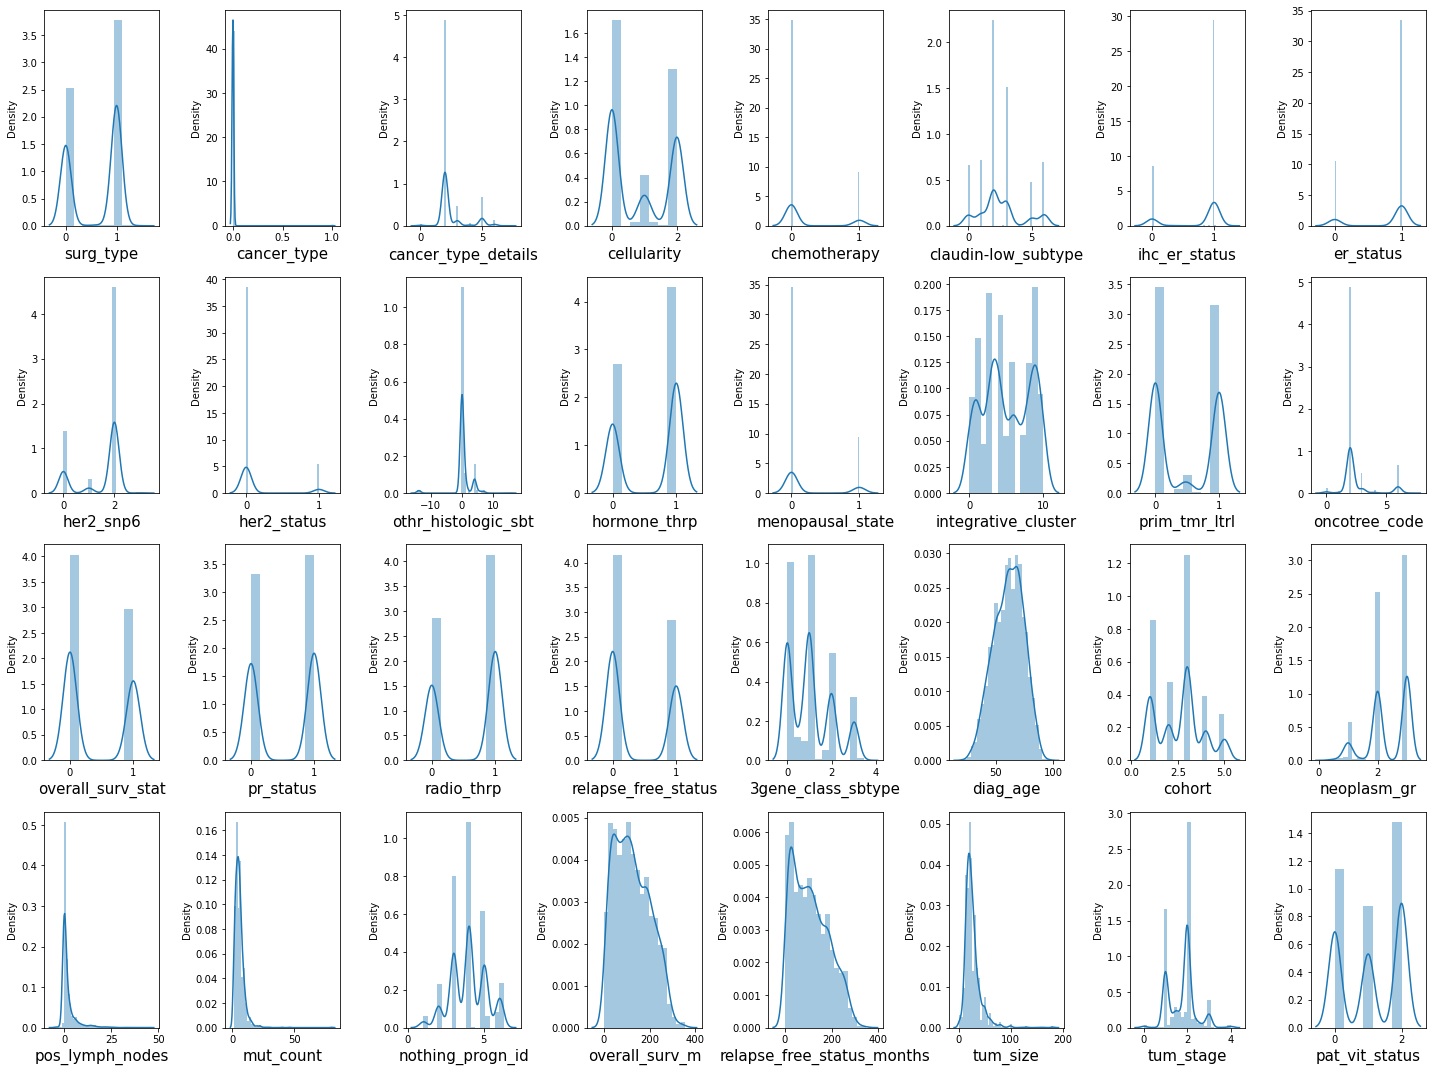

In [53]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in working_data:
    if plotnumber <= 32:
        ax = plt.subplot(4, 8, plotnumber)
        sns.distplot(working_data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

### Iar acum analizam datele in comparatie cu rezultatele din target, pentru a fi mai usorm v-om folosi doar daca a supravietuit sa u a murit din cauza cancerului

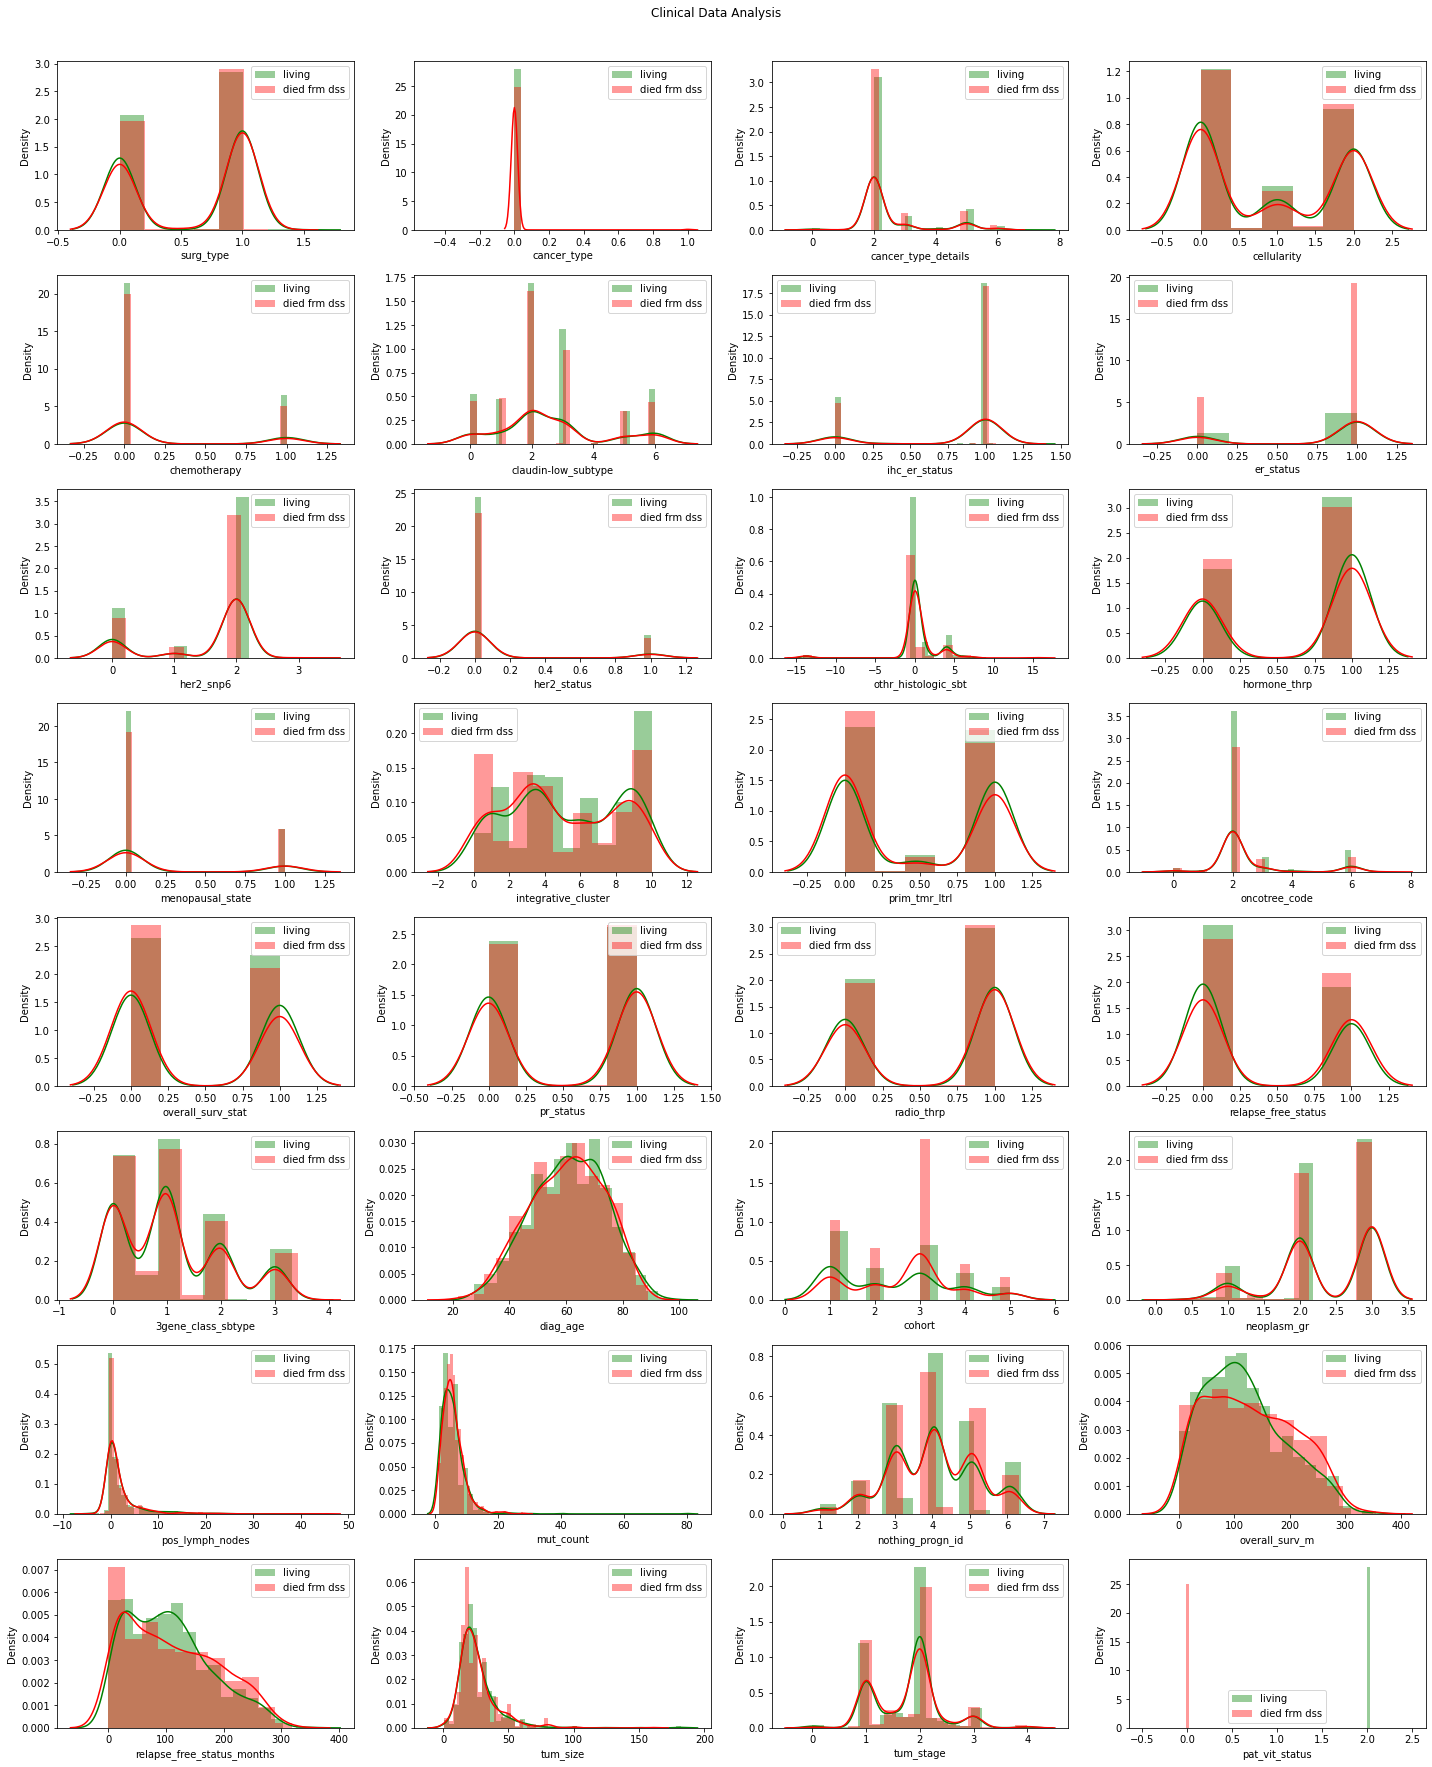

In [54]:
fig = plt.figure(figsize = (20, 25))
j = 0
#num_clinical_columns= ['age_at_diagnosis', 'lymph_nodes_examined_positive','mutation_count','nottingham_prognostic_index', 'overall_survival_months', 'tumor_size' ]
for column in working_data:
    plt.subplot(8, 4, j+1)
    j += 1
    sns.distplot(working_data[column][working_data["pat_vit_status"]==2],color='g', label = 'living')
    sns.distplot(working_data[column][working_data["pat_vit_status"]==0],color='r', label = 'died frm dss')
    plt.legend(loc='best')
fig.suptitle('Clinical Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

### vom analiza corrrelatia din acest dataset

<AxesSubplot:>

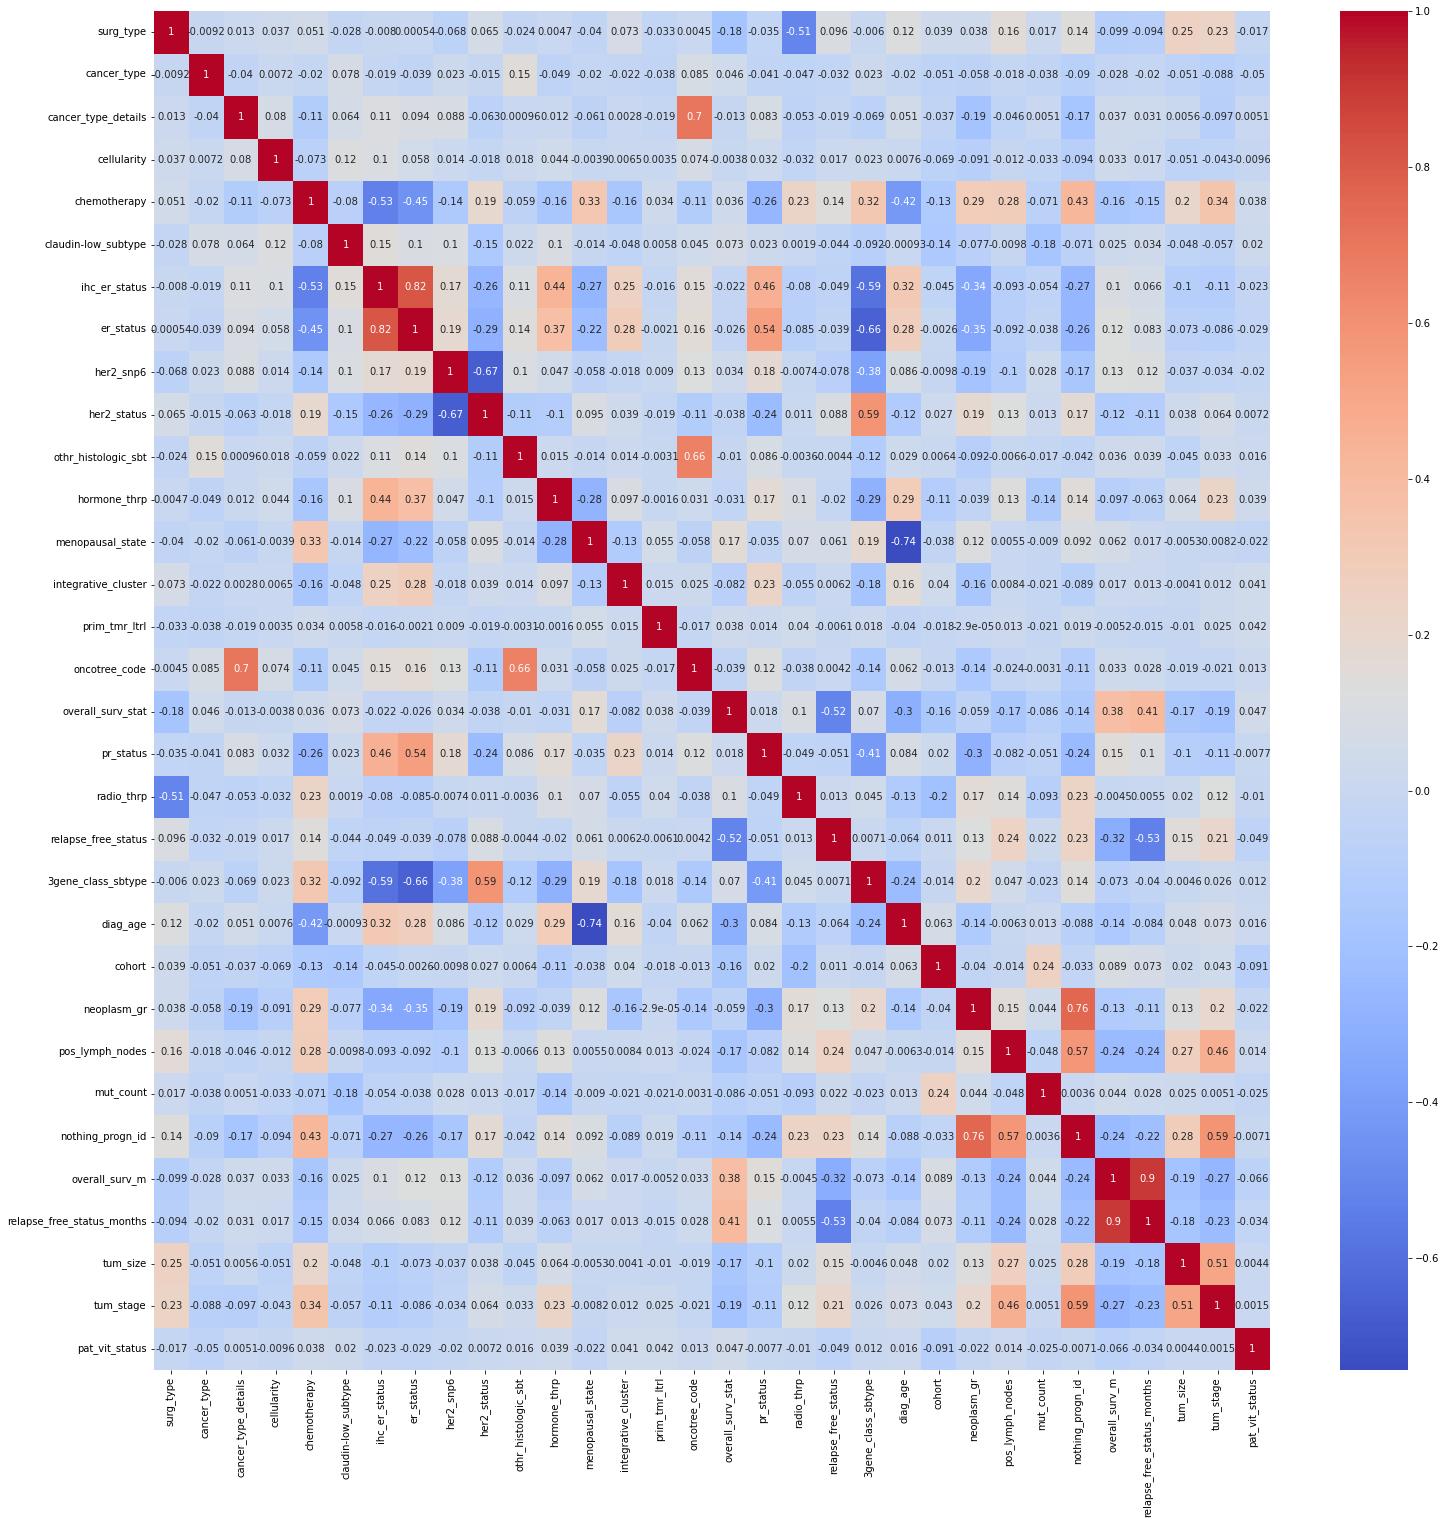

In [55]:
plt.figure(figsize=(25,25))
sns.heatmap(working_data.corr(),annot=True,cmap='coolwarm')

### Chiar daca corelatia datelor x cu coloana target este mica, exista corelatii destul de bune intre cele din x doar

### Pentru a vedea diferenta mai repede,efectuam si pca-ul insa mai intai trebuie sa scalam datele, le aducem in intervalul 0-1

In [56]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range =(0, 1))
x_rescaled = min_max_scaler.fit_transform(x)  

print ("\nAfter min max Scaling : \n", x_rescaled)


After min max Scaling : 
 [[0.70855206 0.         0.28571429 ... 0.40028293 0.1160221  0.5       ]
 [0.         0.         0.28571429 ... 0.24112247 0.04972376 0.25      ]
 [0.70855206 0.         0.28571429 ... 0.43674577 0.07734807 0.5       ]
 ...
 [0.70855206 0.         0.28571429 ... 0.34984699 0.13259669 0.42529002]
 [0.70855206 0.         0.28571429 ... 0.24568393 0.13259669 0.57168029]
 [0.         0.         0.28571429 ... 0.57520642 0.10497238 0.45092664]]


In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9)
pca.fit(x_rescaled)
reduced = pca.transform(x_rescaled)

In [58]:
reduced.shape

(1980, 15)

In [59]:
x_red = pd.DataFrame(data = reduced
             , columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15'])

In [60]:
x_red.shape

(1980, 15)

In [61]:
principal_data=pd.concat([x_red,y],axis=1)

<AxesSubplot:>

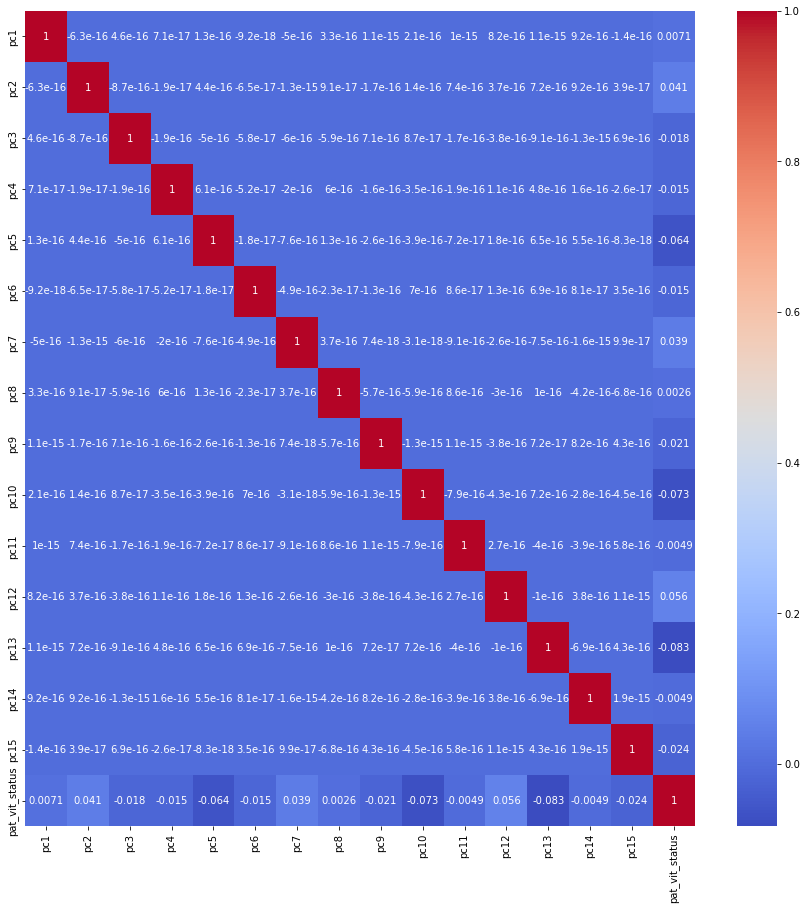

In [62]:
plt.figure(figsize=(15,15))
sns.heatmap(principal_data.corr(),annot=True,cmap='coolwarm')

#### acum deja corelatiile intre coloanele x sunt foarte mici dar cu y situatia e un pic mai buna

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train_red,x_test_red,y_train_red,y_test_red=train_test_split(x_red,y,test_size=0.2,random_state=42)

### Antrenam un model pe baza de regresie logistica doar pentru o simpla analiza a situatiei initiale


              precision    recall  f1-score   support

           0       0.78      0.80      0.79       142
           1       0.60      0.64      0.62        91
           2       0.95      0.90      0.92       163

    accuracy                           0.80       396
   macro avg       0.78      0.78      0.78       396
weighted avg       0.81      0.80      0.81       396



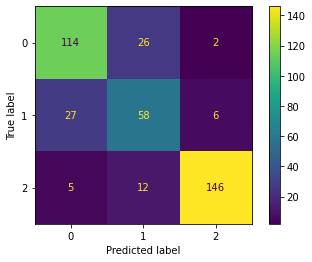

In [64]:

lr_model = LogisticRegression(random_state=42,class_weight='balanced')
lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.82      0.81       504
           1       0.71      0.74      0.72       406
           2       0.92      0.89      0.90       674

    accuracy                           0.83      1584
   macro avg       0.81      0.82      0.81      1584
weighted avg       0.83      0.83      0.83      1584



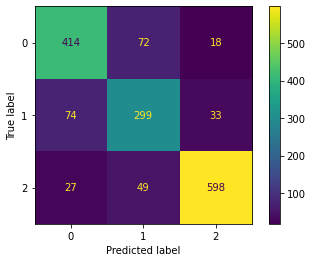

In [65]:
lr_model.fit(x_train,y_train)
y_train_pred = lr_model.predict(x_train)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
print("\n"+ classification_report(y_train, y_train_pred))

### Pentru primul model pe un dataset initial observam rezutate destul de bune,dar avem nevoie de rezultate si mai bune

#### Cream o functie pentru a verifica diferenta intre acuratetea la test si train, ca sa deduce overfittingul

In [66]:
from sklearn.model_selection import KFold
def test_model(lr_model,x,y):
    kf = KFold(n_splits=4)
    f1_train = []
    f1_test = []
    for train_index, test_index in kf.split(x):
           x_train, x_test = x.iloc[train_index], x.iloc[test_index]
           y_train, y_test = y.iloc[train_index], y.iloc[test_index]
           lr_model.fit(x_train, y_train)
           y_train_pred = lr_model.predict(x_train)
           y_test_pred = lr_model.predict(x_test)
           f1_train.append(f1_score(y_train, y_train_pred,average='weighted'))
           f1_test.append(f1_score(y_test, y_test_pred,average='weighted'))
    plt.figure(figsize=(7,7))
    folds = range(1, kf.get_n_splits()+1 )
    plt.plot(folds, f1_train, 'o-', color='green', label='train')
    plt.plot(folds, f1_test, 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.title(lr_model)
    plt.xlabel('Number of fold')
    plt.ylabel('f1_score')
    plt.show()

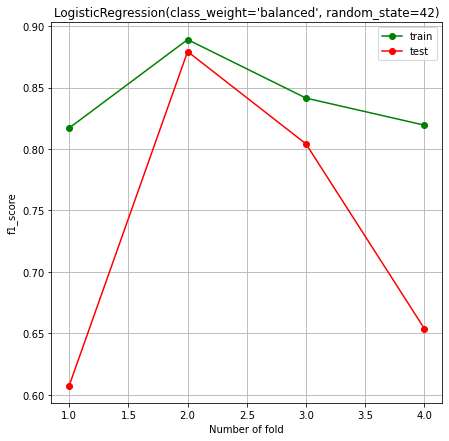

In [67]:
test_model(lr_model,x,y)

### Acuratetea la train e mai mare ,in unele momente exista o diferenta destul de mare, fapt ce ne induce ca avem overfitting

### Incercam sa eliminam anomaliile,importam isolation forest

In [68]:
iforest = IsolationForest(n_estimators=20, verbose=2)
iforest.fit(x_train)

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


IsolationForest(n_estimators=20, verbose=2)

In [69]:
pred = iforest.predict(x_train)
isolation_forest_outliers = np.count_nonzero(pred == -1)/np.count_nonzero(pred != 5)
# trebuie de facut iloc la valorile din X, nu din train, pentru a putea egala testul
x_train_iforest, y_train_iforest = x_train.iloc[(pred != -1), :], y_train[(pred != -1)]

#### Prezicem datele anormale si le afisam pe un grafic

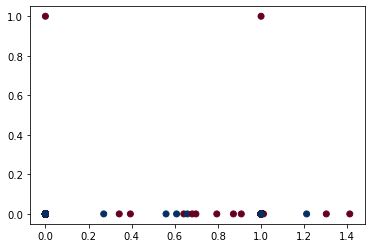

In [70]:
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=pred, cmap='RdBu')

### Procentajul de date anormale

In [71]:
isolation_forest_outliers

0.40845959595959597


              precision    recall  f1-score   support

           0       0.93      0.99      0.96       142
           1       0.91      0.88      0.89        91
           2       1.00      0.96      0.98       163

    accuracy                           0.95       396
   macro avg       0.95      0.94      0.94       396
weighted avg       0.95      0.95      0.95       396



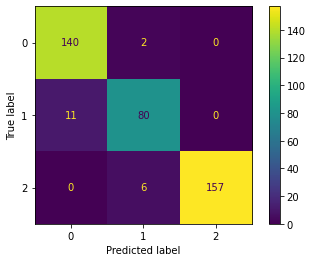

In [72]:
lr.fit(x_train_iforest, y_train_iforest)
y_pred_lr_is = lr.predict(x_test)
y_pred_lr_is=y_pred_lr_is.round(decimals=0)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr_is)
print("\n"+ classification_report(y_test,y_pred_lr_is))

### Observam o dinamica buna a rezultatelor dupa aceste operatii
### Incercam si pe datele dupa pca


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       142
           1       1.00      0.86      0.92        91
           2       1.00      1.00      1.00       163

    accuracy                           0.97       396
   macro avg       0.97      0.95      0.96       396
weighted avg       0.97      0.97      0.97       396



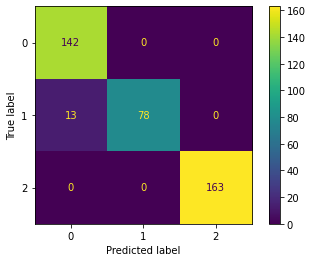

In [73]:
lr_model.fit(x_train_red,y_train_red)
y_pred_red = lr_model.predict(x_test_red)
ConfusionMatrixDisplay.from_predictions(y_test_red,y_pred_red)
print("\n"+ classification_report(y_test_red, y_pred_red))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       504
           1       1.00      0.87      0.93       406
           2       1.00      1.00      1.00       674

    accuracy                           0.97      1584
   macro avg       0.97      0.96      0.96      1584
weighted avg       0.97      0.97      0.97      1584



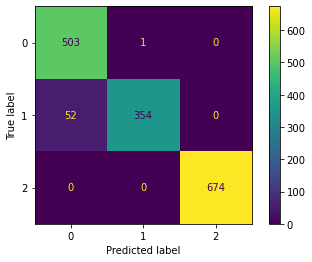

In [74]:
y_train_pred_red = lr_model.predict(x_train_red)
ConfusionMatrixDisplay.from_predictions(y_train_red,y_train_pred_red)
print("\n"+ classification_report(y_train_red,y_train_pred_red))

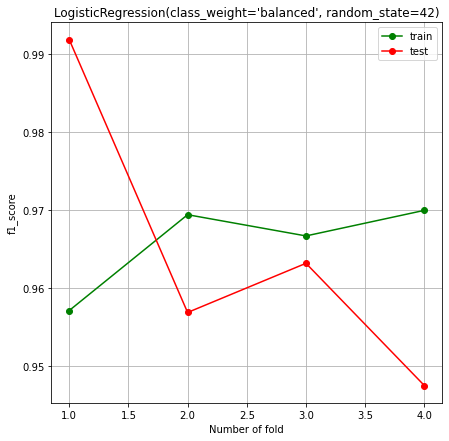

In [75]:
test_model(lr_model,x_red,y)

### Dupa utilizarea pca, rezultatele sunt si mai buna, dar inca exista diferenta intre acuratetea de train si cea de test

### Balansam datele

In [76]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=12)

In [77]:
x_bal,y_bal=smk.fit_resample(x_train ,y_train)

### In viitoarele antrenari vom folosi 6 algoritmi de ML ,LogisticRegression,RandomForestClassifier,DecisionTreeClassifier GausianNB,KneighborsClassifier,si BernoulliNB pentru a determina cele mai bune rezultate pe date diferite    
### Cream o functie pentru antrenarea tuturor modelelor, si cu posibilitatea de a afisa confusion matrix si accuracy report, sau de a stoca f1 pentru ulterioara evaluare a rezultatelor

In [78]:
model_list=[LogisticRegression,RandomForestClassifier,DecisionTreeClassifier,GaussianNB,KNeighborsClassifier,BernoulliNB]   
str_model_list=['LR','RF','DT','GNB','KNN','BNB']

def model_list_train(x_train,x_test,y_train,y_test,confusion):
    f1 = []

    for model in model_list :
        if model == model_list[2]:
            clf = model(max_depth = 5,random_state = 0)
            clf.fit(x_train,y_train)
            y_pred_tree = clf.predict(x_test)
            f1.append(f1_score(y_test, y_pred_tree,average='weighted'))
            if confusion =='confusion':
                ConfusionMatrixDisplay.from_predictions(y_test,y_pred_tree)
                print("\n "+str(model)+"\n "+ classification_report(y_test, y_pred_tree))
        else:
            model = model()
            model.fit(x_train,y_train)
            y_pred = model.predict(x_test)
            f1.append(f1_score(y_test, y_pred,average='weighted'))
            if confusion =='confusion':
                ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
                print("\n "+str(model)+"\n "+ classification_report(y_test, y_pred))
    if confusion == 'f1':
        return f1




 LogisticRegression()
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       142
           1       0.60      0.64      0.62        91
           2       0.91      0.85      0.88       163

    accuracy                           0.80       396
   macro avg       0.77      0.77      0.77       396
weighted avg       0.80      0.80      0.80       396


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       142
           1       1.00      0.86      0.92        91
           2       1.00      1.00      1.00       163

    accuracy                           0.97       396
   macro avg       0.97      0.95      0.96       396
weighted avg       0.97      0.97      0.97       396


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       142
           1       

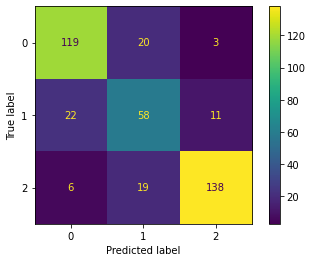

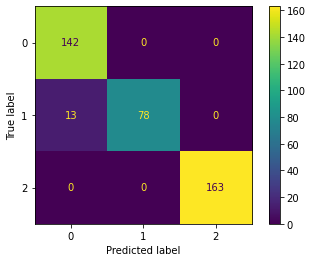

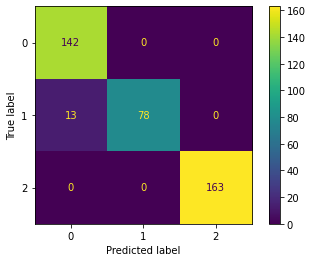

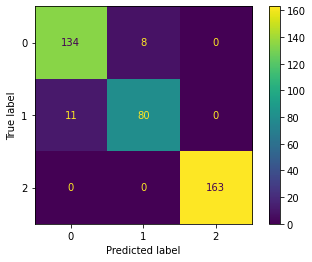

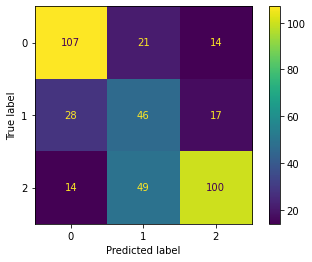

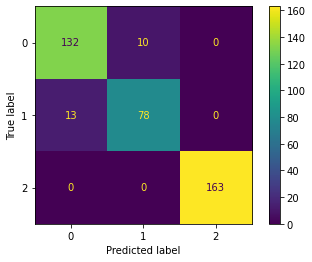

In [79]:
model_list_train(x_bal,x_test,y_bal,y_test,confusion='confusion')

### Cream o functie ca sa vizualizam performanta celor 6 algoritmi pentru cate un set de date

In [80]:
def f1_plot(f1):
    fig = plt.figure(figsize =(15, 10))
    df = pd.DataFrame({"model":str_model_list,
                      "f1_score":f1})
    df_sort = df.sort_values("f1_score")
    plt.bar('model','f1_score',data = df_sort)
    plt.xlabel("model")
    plt.ylabel("f1_score")
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


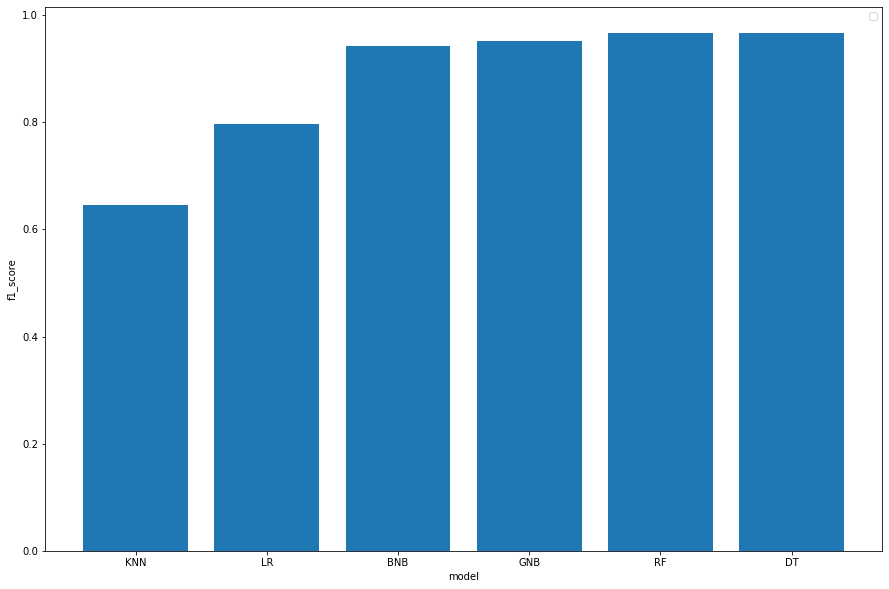

In [81]:
f1_bal=model_list_train(x_bal,x_test,y_bal,y_test,confusion='f1')
f1_plot(f1_bal)

### Random Forest are cel mai bun rezultat insa iar sunt probleme cu overfitting

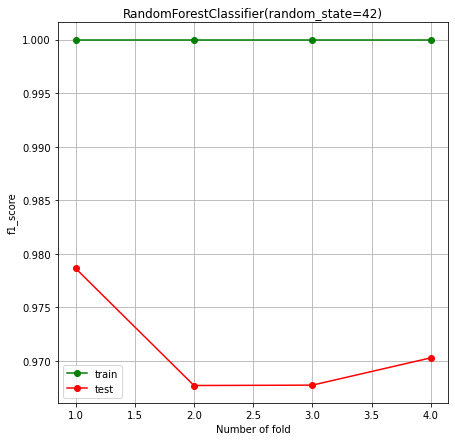

In [82]:
rf_model=RandomForestClassifier(random_state=42)
test_model(rf_model,x_bal,y_bal)

### Inlaturam anomaliile din datele reduse dupa PCA

In [83]:
iforest.fit(x_train_red)

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


IsolationForest(n_estimators=20, verbose=2)

In [84]:
pred = iforest.predict(x_train_red)
isolation_forest_outliers = np.count_nonzero(pred == -1)/np.count_nonzero(pred != 5)
# trebuie de facut iloc la valorile din X, nu din train, pentru a putea egala testul
x_train_iforest_red, y_train_iforest_red = x_train_red.iloc[(pred != -1), :], y_train_red[(pred != -1)]

### Graficul cu distributia datelor anormale

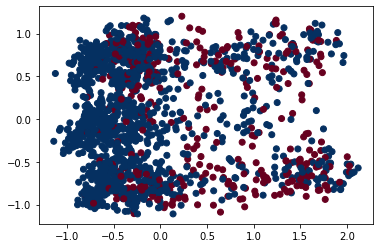

In [85]:
plt.scatter(x_train_red.iloc[:, 0], x_train_red.iloc[:, 1], c=pred, cmap='RdBu')

#### Procentajul datelor lipsa din datele reduse

In [86]:
isolation_forest_outliers

0.22095959595959597


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       142
           1       0.86      0.86      0.86        91
           2       1.00      0.92      0.96       163

    accuracy                           0.93       396
   macro avg       0.92      0.93      0.92       396
weighted avg       0.94      0.93      0.93       396



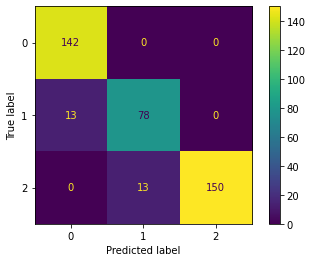

In [87]:
lr.fit(x_train_iforest_red,y_train_iforest_red)
y_pred_lr_ir=lr.predict(x_test_red)
y_pred_lr_ir=y_pred_lr_ir.round(decimals=0)
ConfusionMatrixDisplay.from_predictions(y_test_red,y_pred_lr_ir)
print("\n"+ classification_report(y_test_red, y_pred_lr_ir))


#### Rezultate tot bune,dar trebuie sa verificam fiecare model cu fiecare tip de date pe care le avem, pentru aceasta vom folosi functia creata anterior


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       142
           1       0.65      0.60      0.63        91
           2       0.94      0.92      0.93       163

    accuracy                           0.82       396
   macro avg       0.79      0.79      0.79       396
weighted avg       0.82      0.82      0.82       396


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       142
           1       1.00      0.86      0.92        91
           2       1.00      1.00      1.00       163

    accuracy                           0.97       396
   macro avg       0.97      0.95      0.96       396
weighted avg       0.97      0.97      0.97       396


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       142
           1       

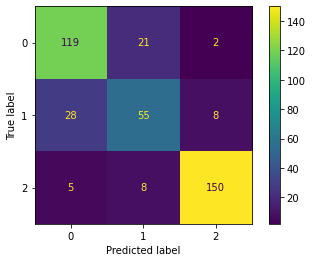

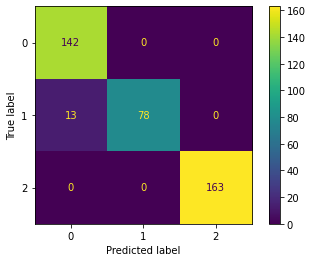

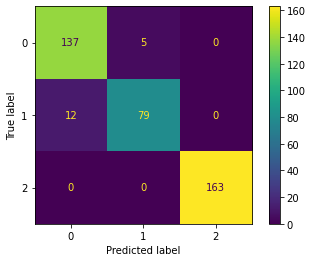

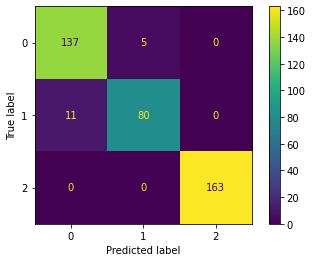

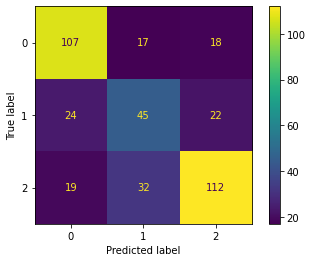

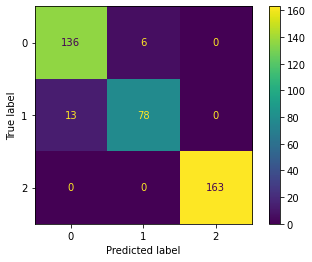

In [88]:
model_list_train(x_train,x_test,y_train,y_test,confusion='confusion')

#### KNN cam nu prea se descurca

### Cream o functie pentru a verifica starea modelului,pentru overfitting sau underfitting

In [89]:
def test_models(lr_model,x_train,x_test,y_train,y_test):
    kf = KFold(n_splits=4)
    f1_train = []
    f1_test = []
    for train_index, test_index in kf.split(x):
           lr_model.fit(x_train, y_train)
           y_train_pred = lr_model.predict(x_train)
           y_test_pred = lr_model.predict(x_test)
           f1_train.append(f1_score(y_train, y_train_pred,average='weighted'))
           f1_test.append(f1_score(y_test, y_test_pred,average='weighted'))
    plt.figure(figsize=(5,5))
    folds = range(1, kf.get_n_splits()+1 )
    plt.plot(folds, f1_train, 'o-', color='green', label='train')
    plt.plot(folds, f1_test, 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.title(lr_model)
    plt.xlabel('Number of fold')
    plt.ylabel('f1_score')
    plt.show()

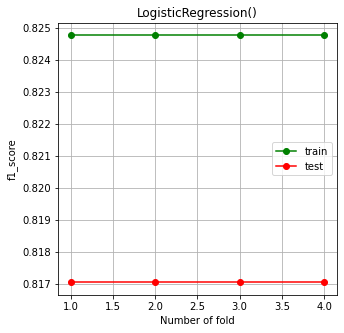

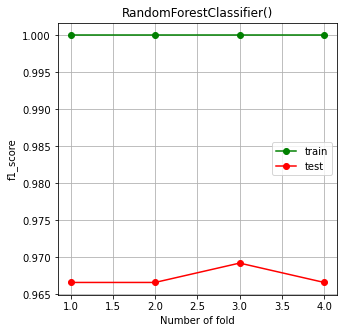

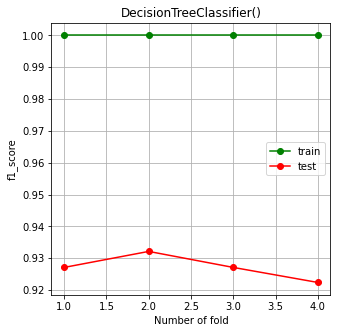

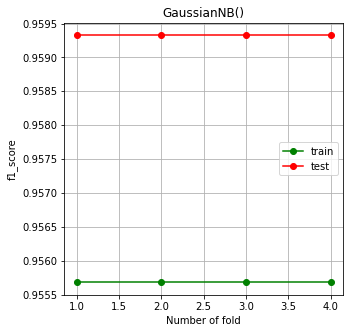

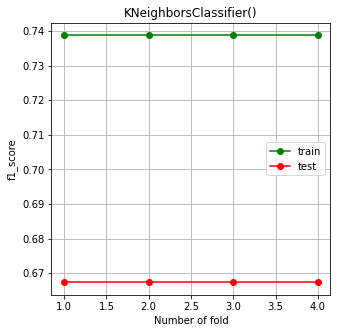

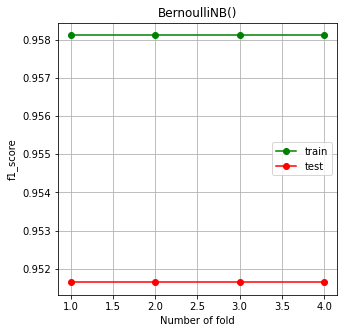

In [90]:
for model in model_list :
    model = model()
    model.fit(x_train,y_train)
    test_models(model,x_train,x_test,y_train,y_test)

#### LR,BNB,GNB au o diferenta intre acurateti mai mica decat 0.01, dar continuam sa cercetam

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


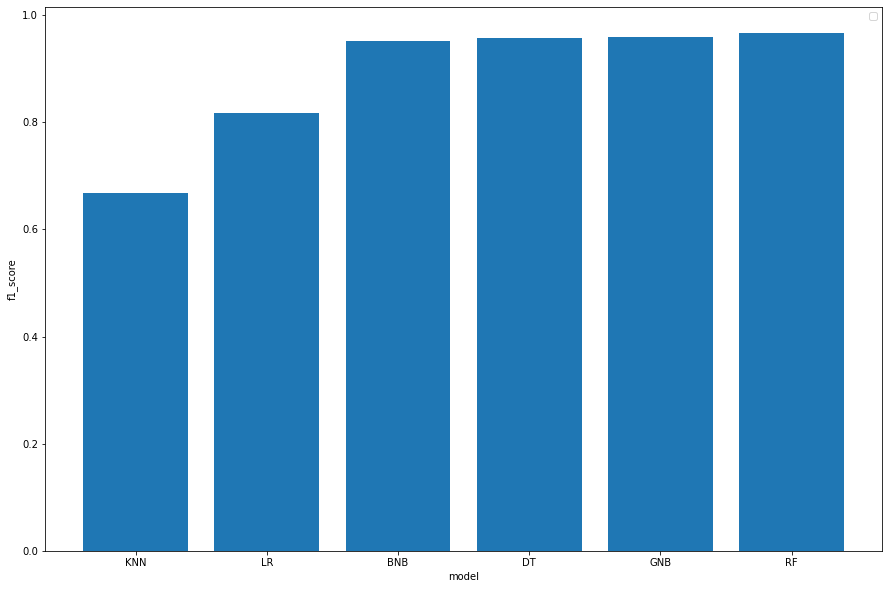

In [91]:
f1_initial=model_list_train(x_train,x_test,y_train,y_test,confusion='f1')
f1_plot(f1_initial)

### Continuam sa efectuam aceeasi operatie cu restul datelor pe care le avem(dupa pca,fara anomalii,dupa pca fara anmalii,balansate)


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       142
           1       1.00      0.86      0.92        91
           2       1.00      1.00      1.00       163

    accuracy                           0.97       396
   macro avg       0.97      0.95      0.96       396
weighted avg       0.97      0.97      0.97       396


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       142
           1       1.00      0.86      0.92        91
           2       1.00      1.00      1.00       163

    accuracy                           0.97       396
   macro avg       0.97      0.95      0.96       396
weighted avg       0.97      0.97      0.97       396


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       142
           1       

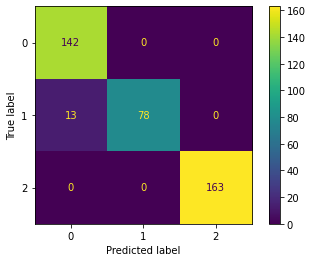

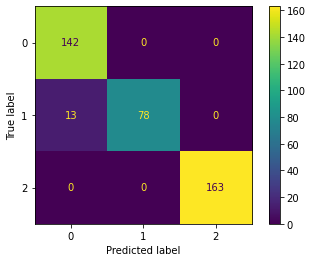

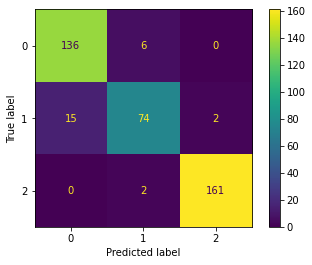

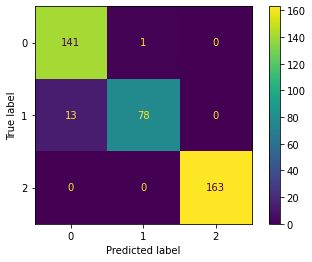

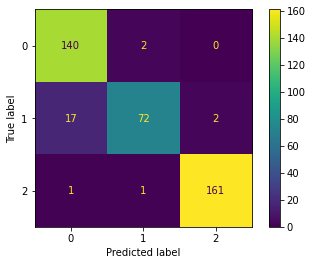

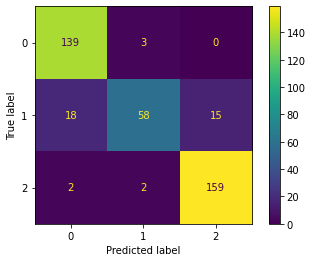

In [92]:
model_list_train(x_train_red,x_test_red,y_train_red,y_test_red,confusion='confusion')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


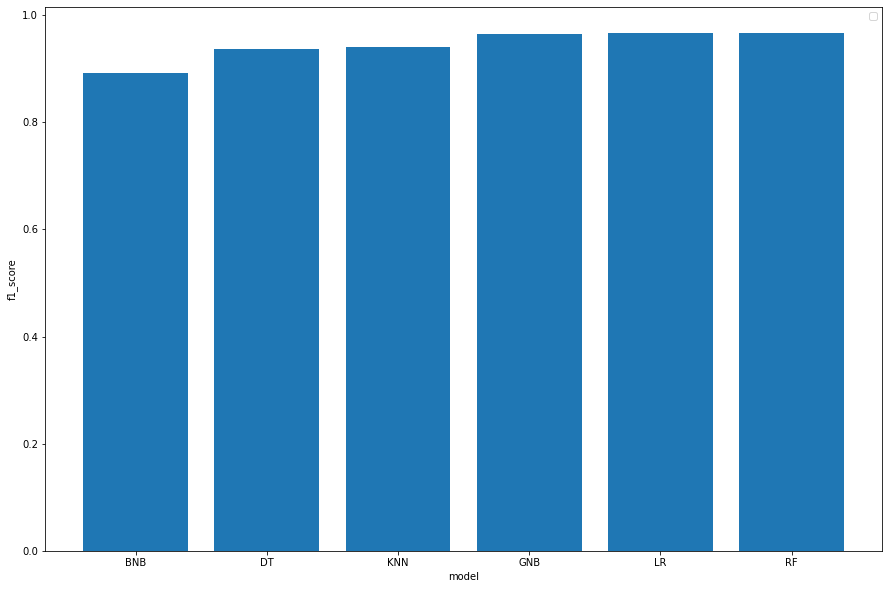

In [93]:
f1_red=model_list_train(x_train_red,x_test_red,y_train_red,y_test_red,confusion='f1')
f1_plot(f1_red)


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       142
           1       0.62      0.60      0.61        91
           2       0.93      0.93      0.93       163

    accuracy                           0.82       396
   macro avg       0.79      0.79      0.79       396
weighted avg       0.82      0.82      0.82       396


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       142
           1       1.00      0.86      0.92        91
           2       1.00      1.00      1.00       163

    accuracy                           0.97       396
   macro avg       0.97      0.95      0.96       396
weighted avg       0.97      0.97      0.97       396


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       142
           1       

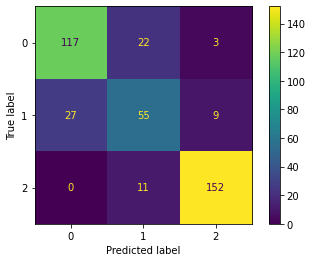

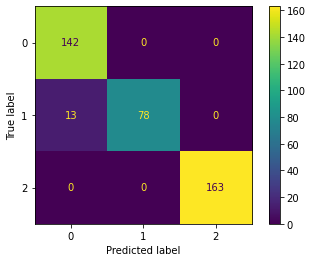

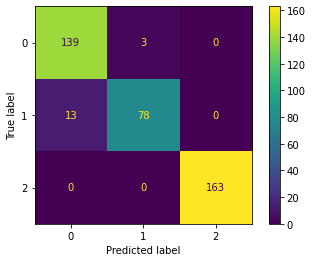

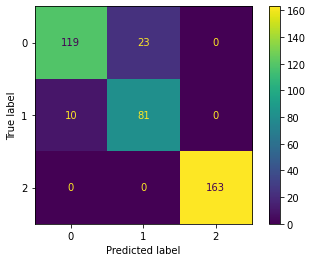

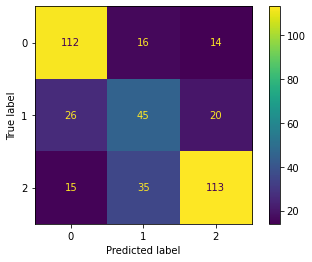

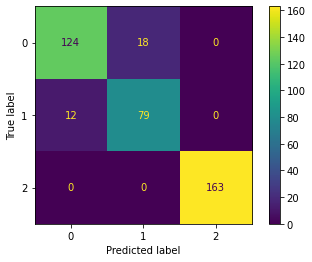

In [94]:
model_list_train(x_train_iforest,x_test,y_train_iforest,y_test,confusion='confusion')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


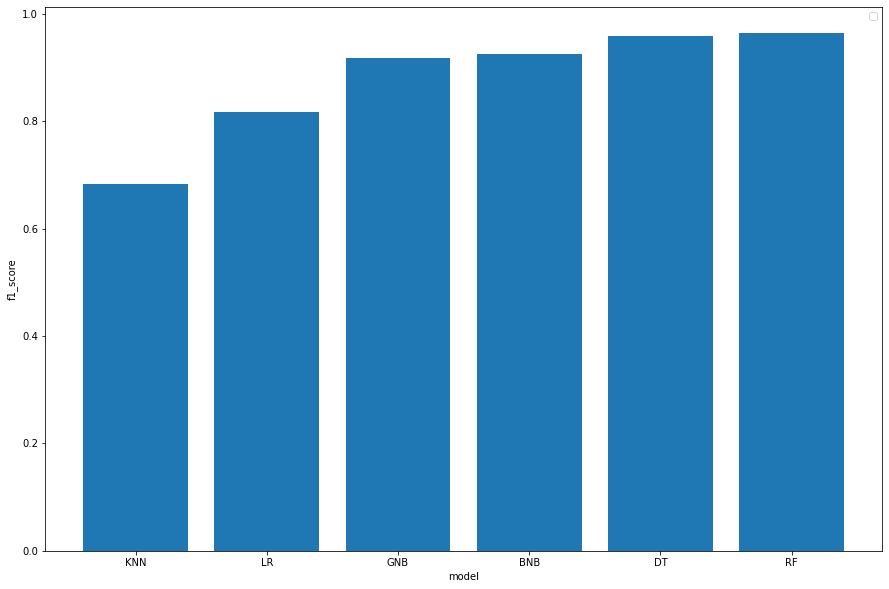

In [95]:
f1_if=model_list_train(x_train_iforest,x_test,y_train_iforest,y_test,confusion='f1')
f1_plot(f1_if)


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       142
           1       1.00      0.86      0.92        91
           2       1.00      1.00      1.00       163

    accuracy                           0.97       396
   macro avg       0.97      0.95      0.96       396
weighted avg       0.97      0.97      0.97       396


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       142
           1       1.00      0.85      0.92        91
           2       0.99      1.00      1.00       163

    accuracy                           0.96       396
   macro avg       0.97      0.95      0.96       396
weighted avg       0.97      0.96      0.96       396


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       142
           1       

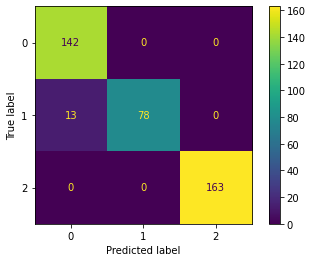

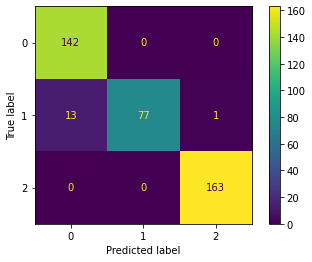

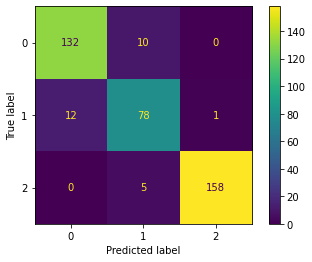

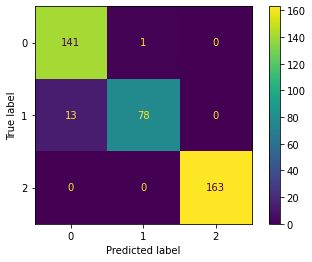

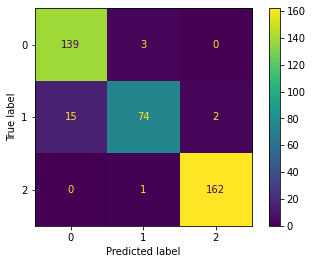

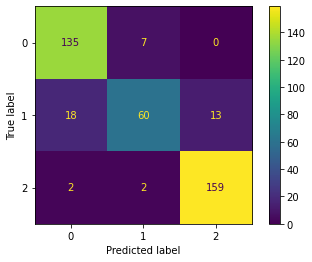

In [96]:
model_list_train(x_train_iforest_red,x_test_red,y_train_iforest_red,y_test_red,confusion='confusion')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


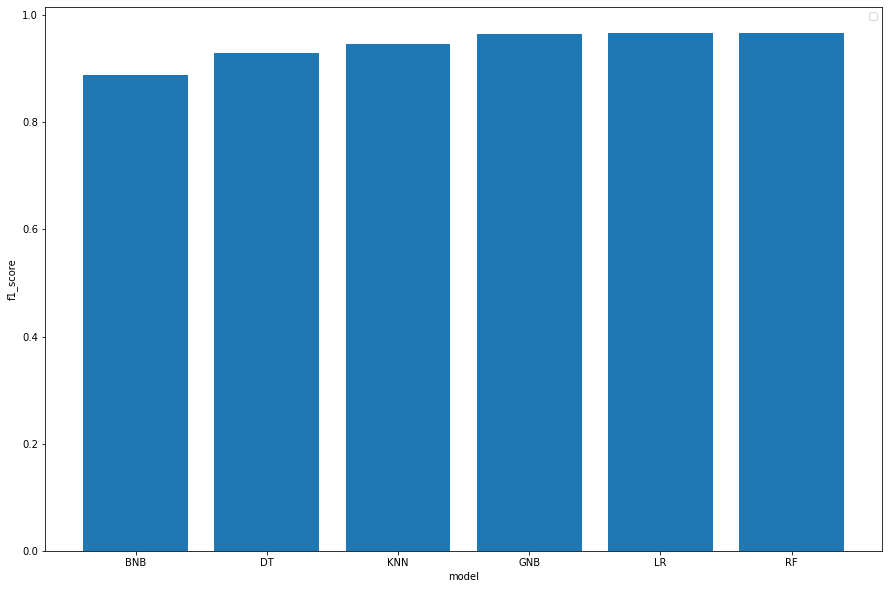

In [97]:
f1_if_red=model_list_train(x_train_iforest_red,x_test_red,y_train_iforest_red,y_test_red,confusion='f1')
f1_plot(f1_if_red)

### Incercam sa facem Feature selection cu Kydavra
#### dar din cauza ca corelatia intre coloanele x si cea y sunt mici, ne vom baza pe corelatia intre coloanele x doar

In [98]:
from kydavra import PearsonCorrelationSelector
pearson = PearsonCorrelationSelector(min_corr=1e-6,max_corr=0.99,erase_corr=True)
selected_columns = pearson.select(working_data, 'pat_vit_status')
len(selected_columns)

0

In [99]:
pearson = PearsonCorrelationSelector(min_corr=1e-6,max_corr=0.99,erase_corr=False)
selected_columns = pearson.select(working_data, 'pat_vit_status')
len(selected_columns)

31

### Ceva nu a decurs cum trebuie, asa ca incercam sa recream un astfel de algoritm

In [100]:
same_columns=[]
working_data_init=working_data
#comparam toate coloanele din datasetul de lucru
for i in range(len(working_data.columns)):
    for j in range(i+1,len(working_data.columns)):
        #verificam daca modulul corelatiei intre 2 coloane este mai mare decat 0.5
        if abs(working_data[working_data.columns[i]].corr(working_data[working_data.columns[j]]))>0.5 :
            # verificam daca nici una dintre aceste 2 coloane nu a fost selectata deja
            if (working_data.columns[i] not in same_columns) or (working_data.columns[j] not in same_columns):
                #verificam care coloana are corelatia mai buna cu y si o selectam pe cea cu valoarea mai mica pentru a fi eliminata
                if abs(working_data[working_data.columns[i]].corr(working_data[working_data.columns[-1]]))< abs(working_data[working_data.columns[j]].corr(working_data[working_data.columns[-1]])):
                    #selectam coloana 
                    same_columns.append(working_data.columns[i])
                else:                                                                                                                            

                    same_columns.append(working_data.columns[j])                                                                                                                           

In [101]:
same_columns=[*set(same_columns)]
same_columns

['diag_age',
 'nothing_progn_id',
 'overall_surv_stat',
 'pr_status',
 'her2_status',
 '3gene_class_sbtype',
 'oncotree_code',
 'ihc_er_status',
 'radio_thrp',
 'relapse_free_status_months',
 'tum_stage',
 'cancer_type_details']

#### Lista cu coloanele selectate, putem verifica acest lucru daca privim in heatmapul de la inceput,ca aceste coloane au o corelatie mare cu alte coloane din X

### Eliminam aceste coloane din X

In [102]:
x_select=x.drop(same_columns,axis=1)

In [103]:
x_train_select,x_test_select,y_train_select,y_test_select=train_test_split(x_select,y,test_size=0.2,random_state=42)

### Verificam dinamica rezultatelor,daca suntem pe calea cea dreapta


              precision    recall  f1-score   support

           0       0.86      0.92      0.88       142
           1       0.49      0.55      0.52        91
           2       0.74      0.64      0.68       163

    accuracy                           0.72       396
   macro avg       0.69      0.70      0.69       396
weighted avg       0.72      0.72      0.72       396



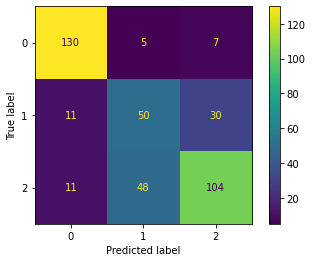

In [104]:
lr_model.fit(x_train_select,y_train_select)
y_pred_select = lr_model.predict(x_test_select)
ConfusionMatrixDisplay.from_predictions(y_test_select,y_pred_select)
print("\n"+ classification_report(y_test_select, y_pred_select))

### O corelatie mai mica decat ma asteptam,chiar mai mica ca in datasetul initial
### incercam sa marim valoarea corelatiei din selectie,pentru aceasta cream o functie care va calcula acuratetea modelului pentru diferite valori a corelatiei intre coloane,aceasta functie este creata in baza algoritmului de selectie anterior,  dar avand ca parametru correlatia,care va fi iterata 

In [272]:
def column_selection(lr_model,corr,working_data):
    same_columns=[]
    for i in range(len(working_data.columns)):
        #print (working_data.columns[i])
        for j in range(i+1,len(working_data.columns)):
            if abs(working_data[working_data.columns[i]].corr(working_data[working_data.columns[j]]))>corr/10 :
                if (working_data.columns[i] not in same_columns) or (working_data.columns[j] not in same_columns):
                    # verificam daca nici una dintre aceste 2 coloane nu a fost selectata deja

                    #verificam care coloana are corelatia mai buna cu y si o selectam pe cea cu valoarea mai mica
                    if abs(working_data[working_data.columns[i]].corr(working_data[working_data.columns[-1]]))< abs(working_data[working_data.columns[j]].corr(working_data[working_data.columns[-1]])):
                        #selectam coloana 
                        same_columns.append(working_data.columns[i])
                    else:                                                                                                                            
                        same_columns.append(working_data.columns[j])                                                                                                                           
    x_select=x.drop(same_columns,axis=1)
    x_train_select,x_test_select,y_train_select,y_test_select=train_test_split(x_select,y,test_size=0.2,random_state=42)
    lr_model.fit(x_train_select,y_train_select)
    y_pred_select = lr_model.predict(x_test_select)
    return f1_score(y_test_select, y_pred_select,average='weighted')

In [273]:
f1_selection=[]
for i in range(3,10):
    f1_selection.append(column_selection(lr_model,i,working_data))

In [274]:
f1_selection

[0.6045264805107149,
 0.6138238728874869,
 0.7754695090471027,
 0.8993975049135191,
 0.9246277429467085,
 0.9291159126931485,
 0.8010829917532815]

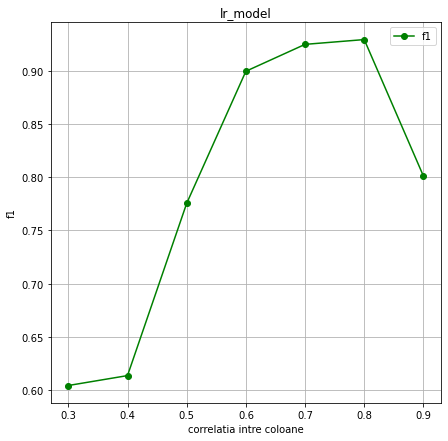

In [275]:
 plt.figure(figsize=(7,7))
x_plot = [x / 10.0 for x in range(3, 10)]
plt.plot(x_plot, f1_selection, 'o-', color='green', label='f1')

plt.legend()
plt.grid()
plt.title("lr_model")
plt.xlabel('correlatia intre coloane')
plt.ylabel('f1')
plt.show()

### Cea mai buna acuratete o avem la limita de corelatie de 0.6,vom folosi aceasta valoare

In [109]:
same_columns=[]
working_data_init=working_data
#comparam toate coloanele din datasetul de lucru
for i in range(len(working_data.columns)):
    #print (working_data.columns[i])
    for j in range(i+1,len(working_data.columns)):
        if abs(working_data[working_data.columns[i]].corr(working_data[working_data.columns[j]]))>0.6 :
            if (working_data.columns[i] not in same_columns) or (working_data.columns[j] not in same_columns):
                # verificam daca nici una dintre aceste 2 coloane nu a fost selectata deja
                
                #verificam care coloana are corelatia mai buna cu y si o selectam pe cea cu valoarea mai mica
                if abs(working_data[working_data.columns[i]].corr(working_data[working_data.columns[-1]]))< abs(working_data[working_data.columns[j]].corr(working_data[working_data.columns[-1]])):
                    #selectam coloana 
                    same_columns.append(working_data.columns[i])
                else:                                                                                                                            

                    same_columns.append(working_data.columns[j])
same_columns=[*set(same_columns)]

In [110]:
x_select=x.drop(same_columns,axis=1)
x_train_select,x_test_select,y_train_select,y_test_select=train_test_split(x_select,y,test_size=0.2,random_state=42)

### Antrenam un model de lr sa vedem daca sunt schimbari


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       142
           1       0.89      0.84      0.86        91
           2       1.00      0.98      0.99       163

    accuracy                           0.94       396
   macro avg       0.93      0.92      0.93       396
weighted avg       0.94      0.94      0.94       396



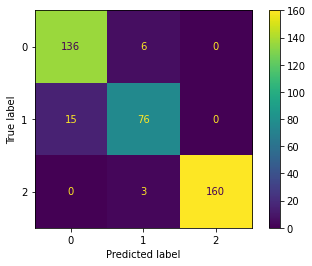

In [111]:
lr_model.fit(x_train_select,y_train_select)
y_pred_select = lr_model.predict(x_test_select)
ConfusionMatrixDisplay.from_predictions(y_test_select,y_pred_select)
print("\n"+ classification_report(y_test_select, y_pred_select))

### Obtinem un rezultat destul de bun, asa ca continuam sa inspectam si restul modelelor


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       142
           1       0.80      0.76      0.78        91
           2       0.96      0.96      0.96       163

    accuracy                           0.90       396
   macro avg       0.89      0.88      0.88       396
weighted avg       0.90      0.90      0.90       396


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       142
           1       1.00      0.86      0.92        91
           2       1.00      1.00      1.00       163

    accuracy                           0.97       396
   macro avg       0.97      0.95      0.96       396
weighted avg       0.97      0.97      0.97       396


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       142
           1       

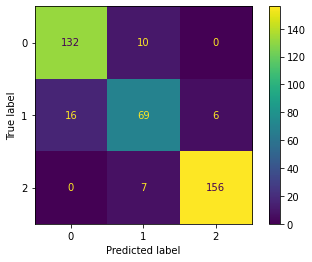

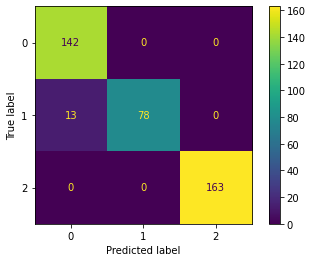

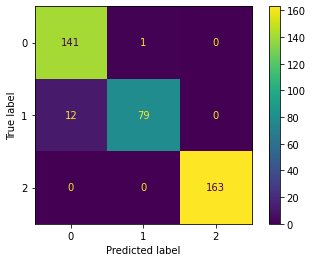

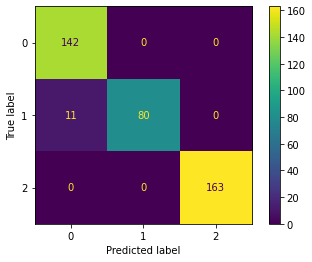

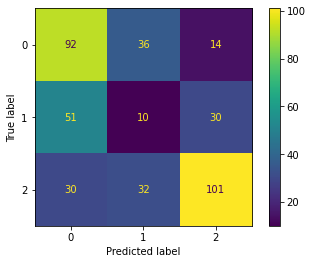

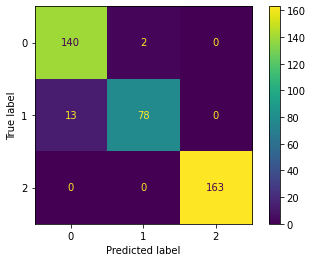

In [112]:
model_list_train(x_train_select,x_test_select,y_train_select,y_test_select,confusion='confusion')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


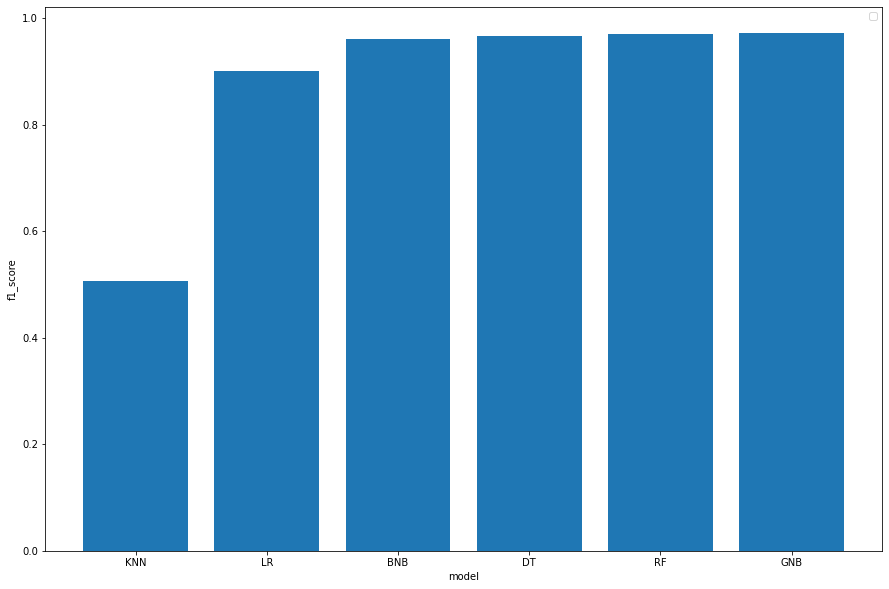

In [113]:
f1_sel=model_list_train(x_train_select,x_test_select,y_train_select,y_test_select,confusion='f1')
f1_plot(f1_sel)

### Pentru dataset mai restrans,GNB se descurca deja mai bine ca RF

### incepem totul din nou, pentru inceput pca

In [149]:
pca = PCA(n_components = 0.99)
pca.fit(x_select)
reduced_select = pca.transform(x_select)

In [150]:
x_select.shape

(1980, 23)

In [151]:
reduced_select.shape

(1980, 2)

### renuntam la aceasta idee deoarece numarul de coloane este diferit,si numarul componentelor principale este cu mult mai mic ca la datasetul initial dupa pca,incercam  isolation forest

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


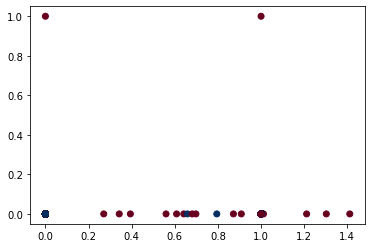

In [117]:
iforest.fit(x_train_select)
pred = iforest.predict(x_train_select)
isolation_forest_outliers = np.count_nonzero(pred == -1)/np.count_nonzero(pred != 5)
# trebuie de facut iloc la valorile din X, nu din train, pentru a putea egala testul
x_train_iforest_select, y_train_iforest_select = x_train_select.iloc[(pred != -1), :], y_train_select[(pred != -1)]
plt.scatter(x_train_select.iloc[:, 0], x_train_select.iloc[:, 1], c=pred, cmap='RdBu')

### Procentajul de date anormale,este unul mare

In [118]:
isolation_forest_outliers

0.5246212121212122


              precision    recall  f1-score   support

           0       0.86      0.96      0.91       142
           1       0.82      0.75      0.78        91
           2       0.97      0.92      0.95       163

    accuracy                           0.90       396
   macro avg       0.88      0.88      0.88       396
weighted avg       0.90      0.90      0.90       396



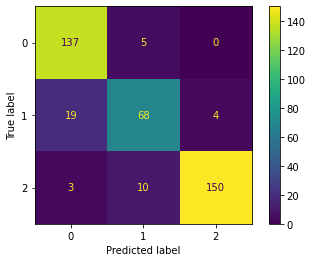

In [119]:
lr_model.fit(x_train_iforest_select,y_train_iforest_select)
y_pred_select = lr_model.predict(x_test_select)
ConfusionMatrixDisplay.from_predictions(y_test_select,y_pred_select)
print("\n"+ classification_report(y_test_select, y_pred_select))


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.88      0.94      0.90       142
           1       0.78      0.76      0.77        91
           2       0.96      0.92      0.94       163

    accuracy                           0.89       396
   macro avg       0.87      0.87      0.87       396
weighted avg       0.89      0.89      0.89       396


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       142
           1       0.99      0.86      0.92        91
           2       1.00      1.00      1.00       163

    accuracy                           0.96       396
   macro avg       0.97      0.95      0.96       396
weighted avg       0.97      0.96      0.96       396


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       142
           1       

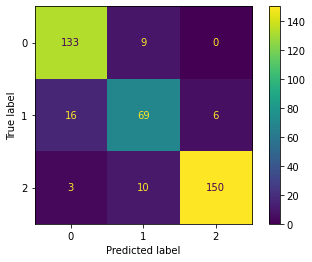

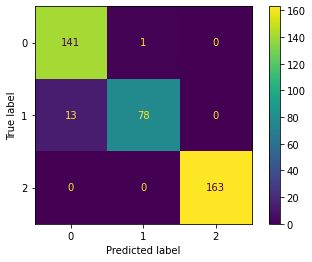

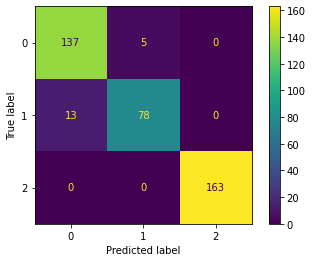

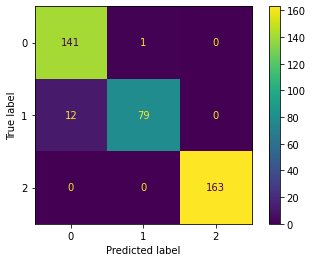

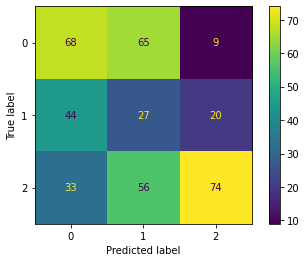

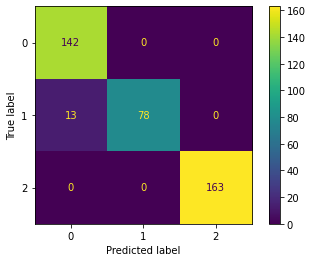

In [120]:
model_list_train(x_train_iforest_select,x_test_select,y_train_iforest_select,y_test_select,confusion='confusion')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


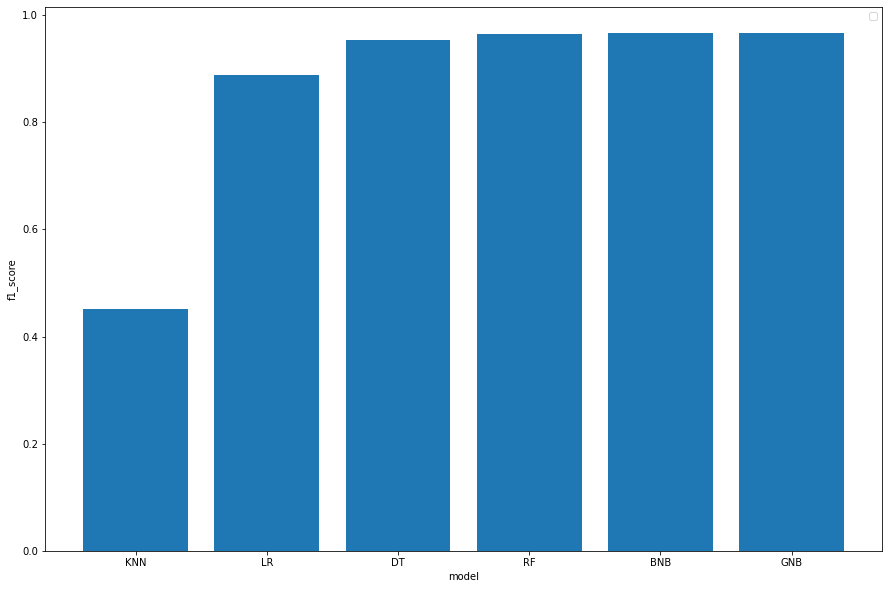

In [121]:
f1_sel_is=model_list_train(x_train_iforest_select,x_test_select,y_train_iforest_select,y_test_select,confusion='f1')
f1_plot(f1_sel_is)

### La fel,GNB arata cele mai bune rezultate

In [154]:
x_bal_sel,y_bal_sel=smk.fit_resample(x_train_select ,y_train_select)


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       142
           1       0.79      0.77      0.78        91
           2       0.97      0.93      0.95       163

    accuracy                           0.89       396
   macro avg       0.88      0.88      0.88       396
weighted avg       0.89      0.89      0.89       396


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       142
           1       1.00      0.86      0.92        91
           2       1.00      1.00      1.00       163

    accuracy                           0.97       396
   macro avg       0.97      0.95      0.96       396
weighted avg       0.97      0.97      0.97       396


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       142
           1       

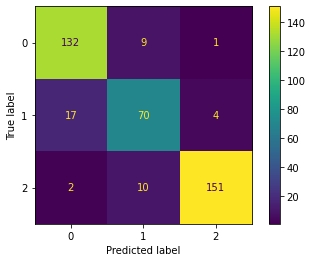

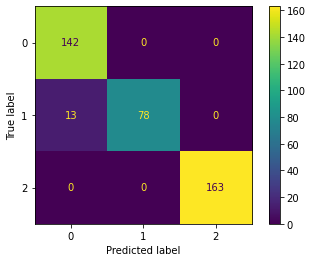

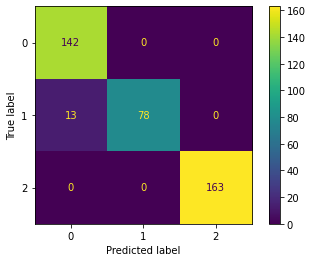

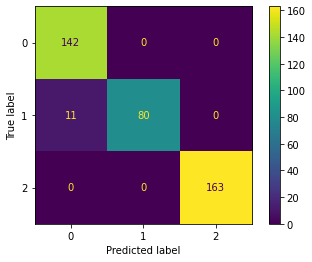

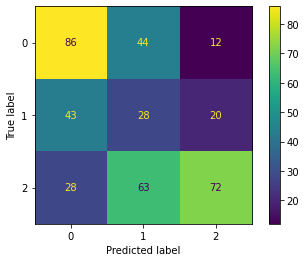

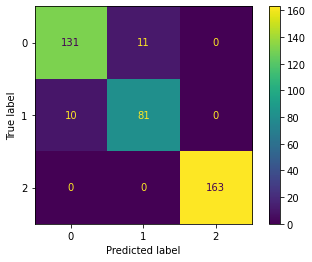

In [155]:
model_list_train(x_bal_sel,x_test_select,y_bal_sel,y_test_select,confusion='confusion')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


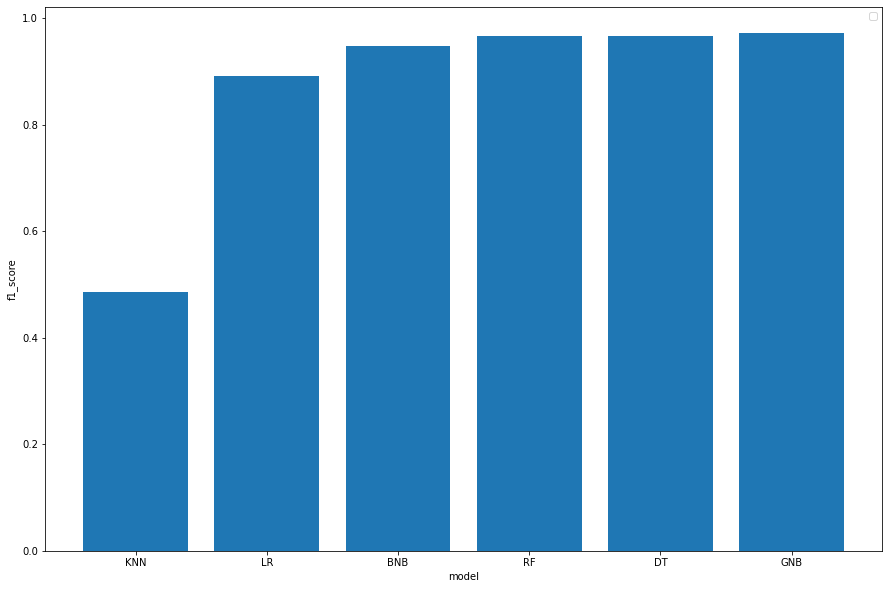

In [156]:
f1_sel_bal=model_list_train(x_bal_sel,x_test_select,y_bal_sel,y_test_select,confusion='f1')
f1_plot(f1_sel_bal)

In [157]:
x_bal_sel_is,y_bal_sel_is=smk.fit_resample(x_train_iforest_select ,y_train_iforest_select)


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       142
           1       0.92      0.79      0.85        91
           2       0.98      0.99      0.98       163

    accuracy                           0.93       396
   macro avg       0.93      0.91      0.92       396
weighted avg       0.93      0.93      0.93       396


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       142
           1       1.00      0.86      0.92        91
           2       1.00      1.00      1.00       163

    accuracy                           0.97       396
   macro avg       0.97      0.95      0.96       396
weighted avg       0.97      0.97      0.97       396


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       142
           1       

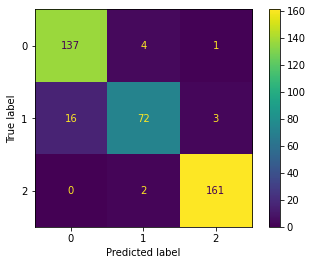

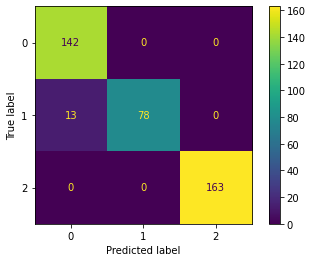

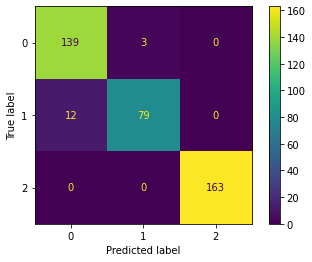

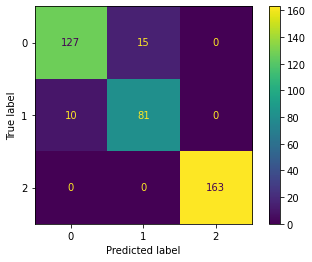

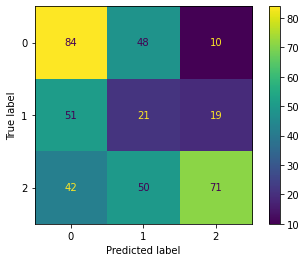

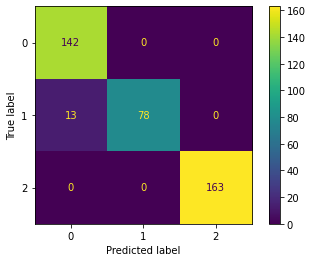

In [158]:
model_list_train(x_bal_sel_is,x_test_select,y_bal_sel_is,y_test_select,confusion='confusion')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


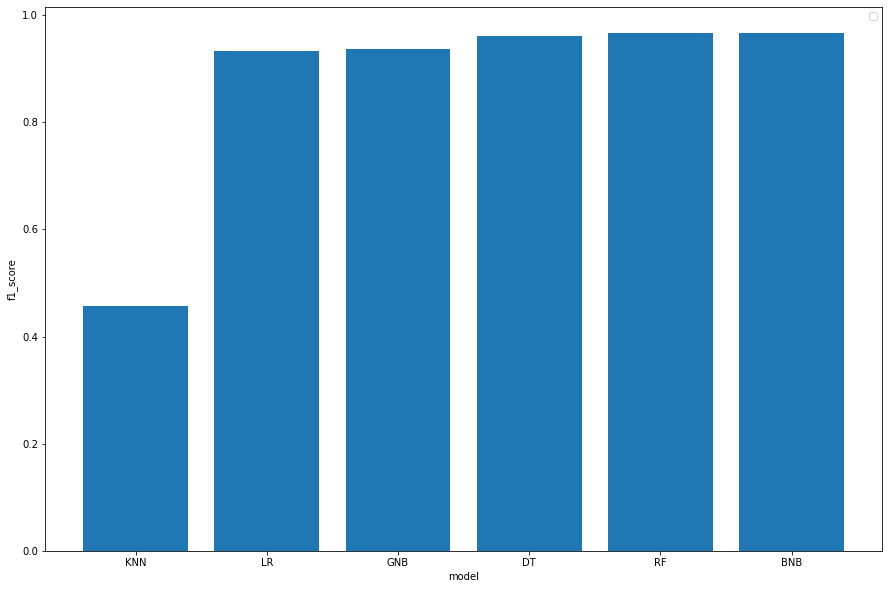

In [159]:
f1_sel_bal_is=model_list_train(x_bal_sel_is,x_test_select,y_bal_sel_is,y_test_select,confusion='f1')
f1_plot(f1_sel_bal_is)

In [160]:
x_bal_sel.shape


(1838, 23)

In [161]:
x_train_select.shape

(1584, 23)

## la dataset mai mic,GNB arata cele mai bune rezultate
## Acum o sa aranjam toate datele intr-un dataset pentru a vedea cel mai bun model

### Incepem pregatirea tuturor datelor pentru vizualizarea rezultatelor generale

In [162]:
f1_total=[f1_initial, f1_red, f1_if, f1_if_red,f1_bal, f1_sel, f1_sel_is, f1_sel_bal, f1_sel_bal_is]

In [131]:
f1_final=[]
for iterat in f1_total:
    f1_final.extend(iterat)


In [132]:
str_model_list=['LR','RF','DT','GNB','KNN','BNB']
other_list=[' initial',' +pca',' isolat',' pca+isolat',' balansat',' select',' sel+isolation',' sel+balans',' sel+bal_isol']
#new_model_list = [item + '#' for item in list_of_strings]
new_model_list = [item + addition for addition in other_list for item in str_model_list]

In [163]:
x_bal_fin_in,y_bal_fin_in=smk.fit(x_train_iforest_red,y_train_iforest_red)

TypeError: cannot unpack non-iterable SMOTETomek object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


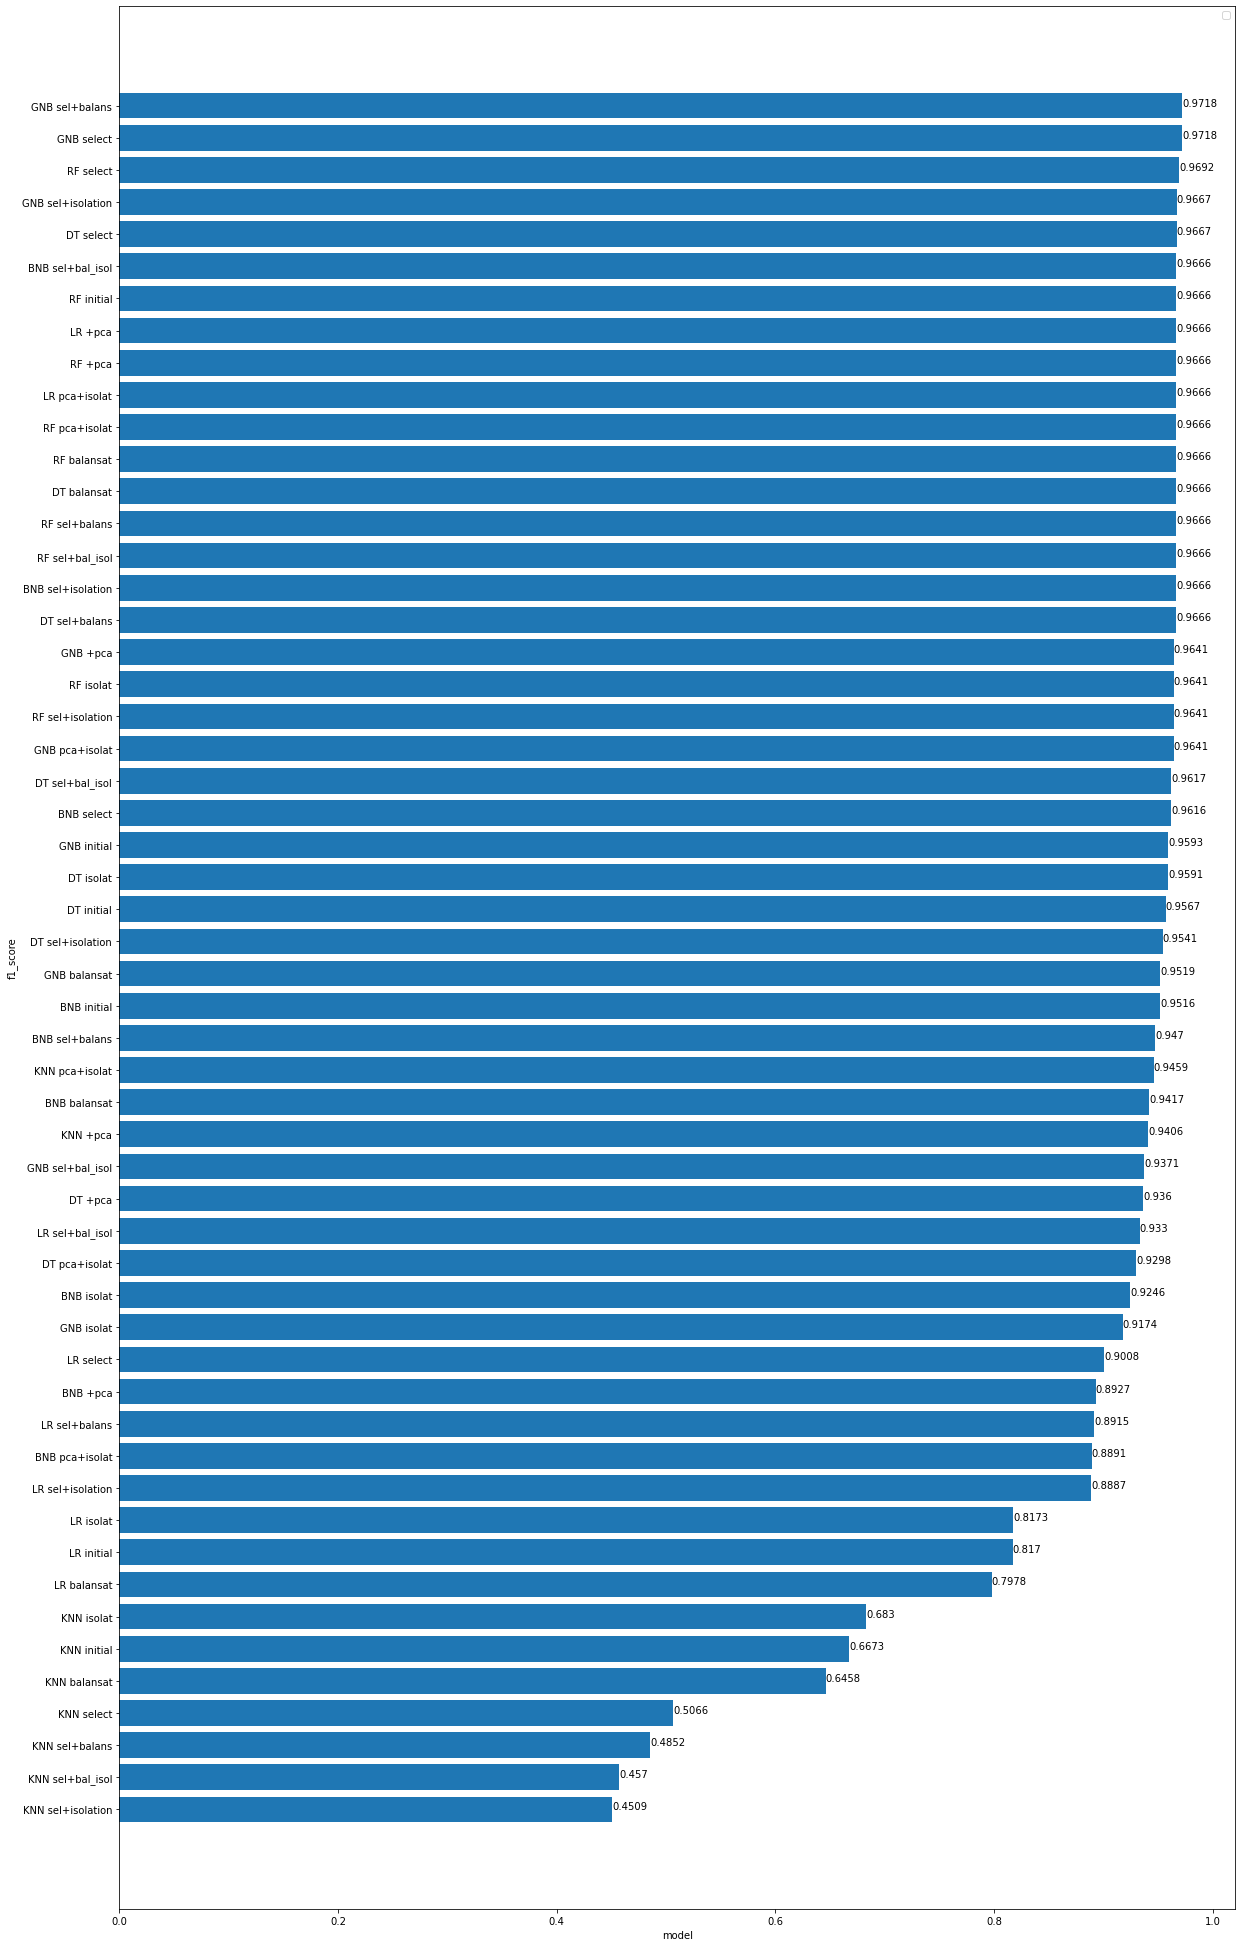

In [133]:
 fig = plt.figure(figsize =(20,35 ))
df = pd.DataFrame({"model":new_model_list,
                  "f1_score":f1_final})
df['f1_score']=df['f1_score'].round(4)
df_sort = df.sort_values("f1_score")
plt.barh('model','f1_score',data = df_sort)
plt.xlabel("model")
plt.ylabel("f1_score")
plt.legend()
for index, value in enumerate(df_sort['f1_score']):
    plt.text(value, index,
             str(value))
plt.show()

### Cream o functie pentru a vizualiza starea modelelor, in dependenta de subsetul de date utilizat

In [134]:
def test_models(lr_model,x_train,x_test,y_train,y_test):
    kf = KFold(n_splits=4)
    f1_train = []
    f1_test = []
    for train_index, test_index in kf.split(x):
           lr_model.fit(x_train, y_train)
           y_train_pred = lr_model.predict(x_train)
           y_test_pred = lr_model.predict(x_test)
           f1_train.append(f1_score(y_train, y_train_pred,average='weighted'))
           f1_test.append(f1_score(y_test, y_test_pred,average='weighted'))
    plt.figure(figsize=(5,5))
    folds = range(1, kf.get_n_splits()+1 )
    plt.plot(folds, f1_train, 'o-', color='green', label='train')
    plt.plot(folds, f1_test, 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.title(lr_model)
    plt.xlabel('Number of fold')
    plt.ylabel('f1_score')
    plt.show()

In [135]:
def test_test_models(x_train,x_test,y_train,y_test):
    for model in model_list :
        model = model()
        model.fit(x_train,y_train)
        test_models(model,x_train,x_test,y_train,y_test)

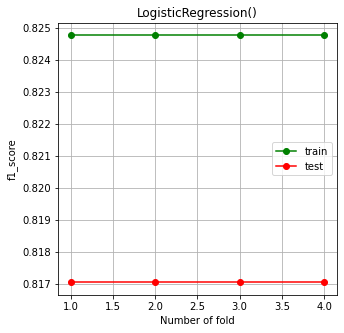

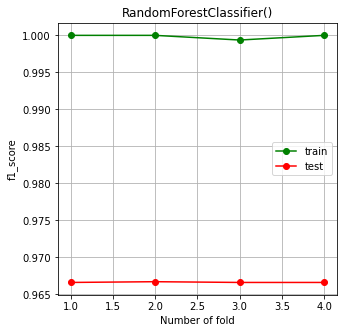

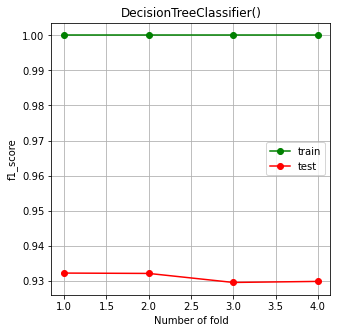

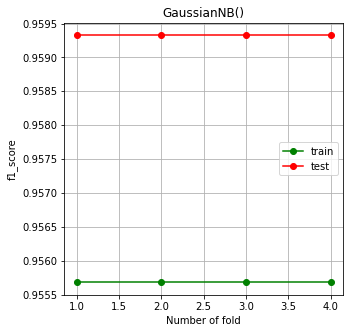

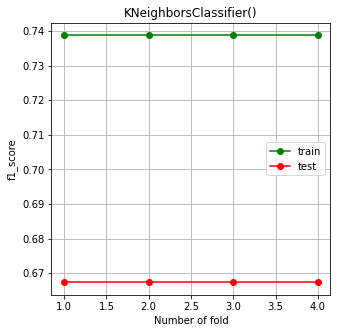

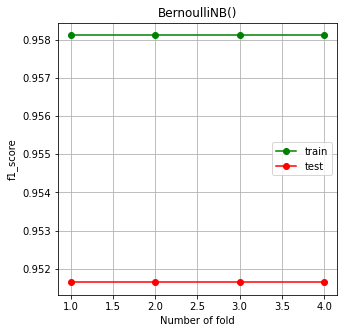

In [136]:
test_test_models(x_train,x_test,y_train,y_test)

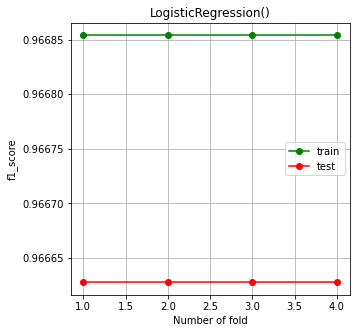

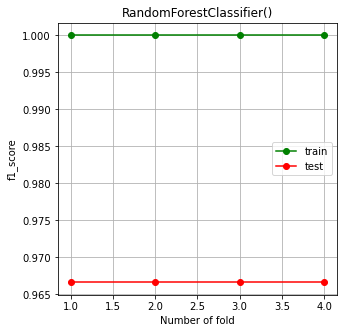

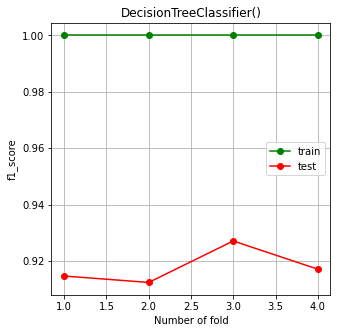

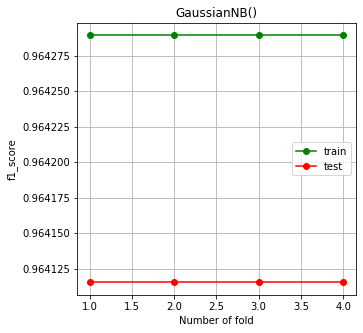

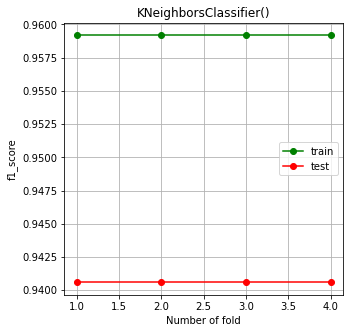

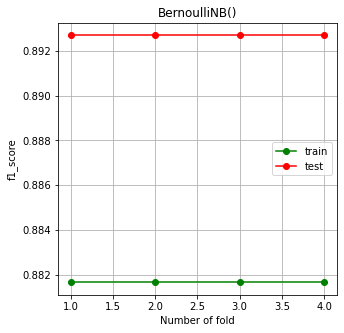

In [137]:
test_test_models(x_train_red,x_test_red,y_train_red,y_test_red)

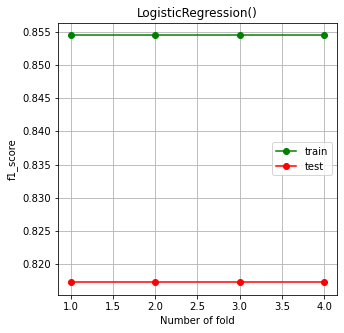

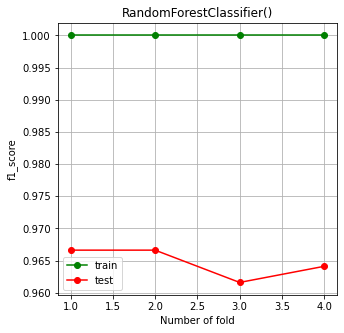

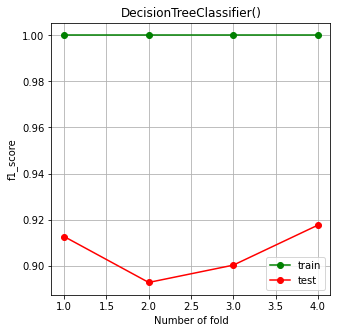

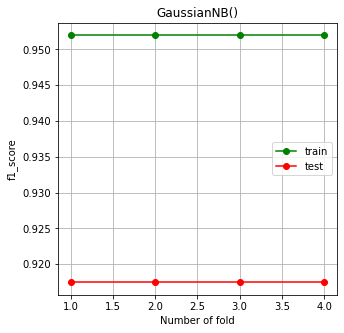

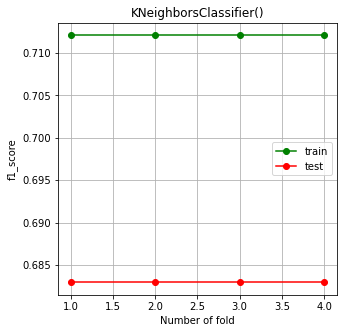

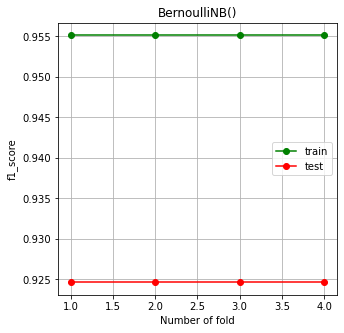

In [138]:
test_test_models(x_train_iforest,x_test,y_train_iforest,y_test)

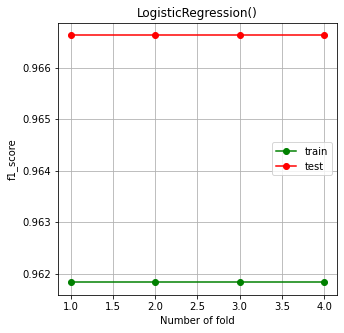

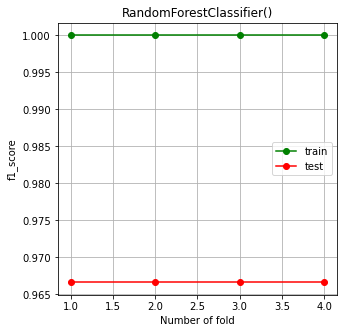

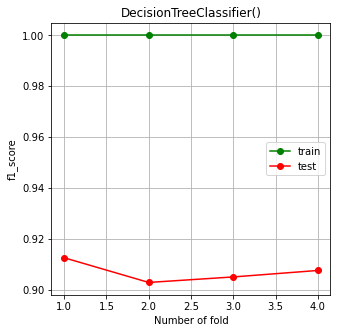

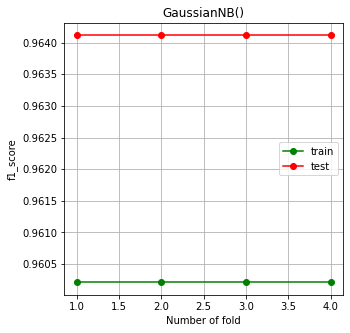

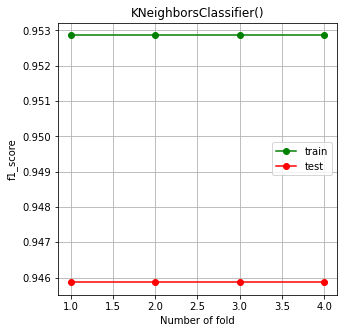

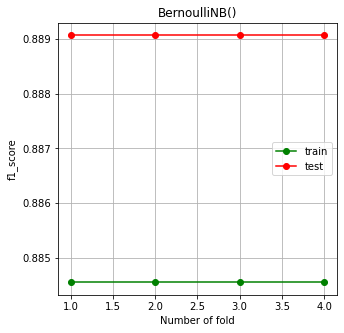

In [139]:
test_test_models(x_train_iforest_red,x_test_red,y_train_iforest_red,y_test_red)

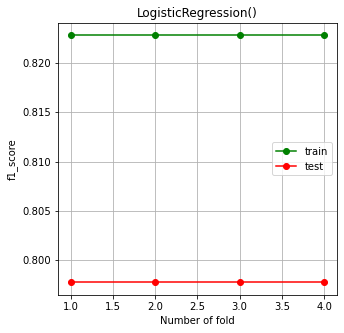

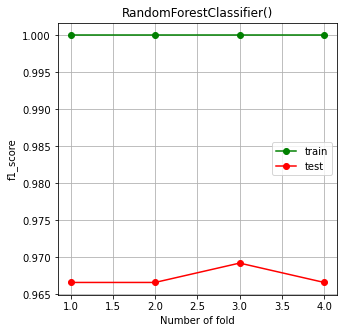

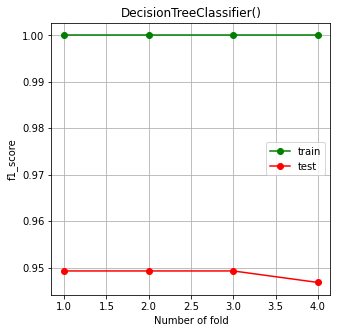

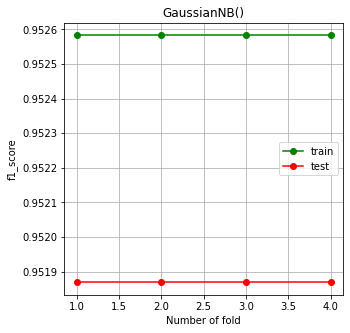

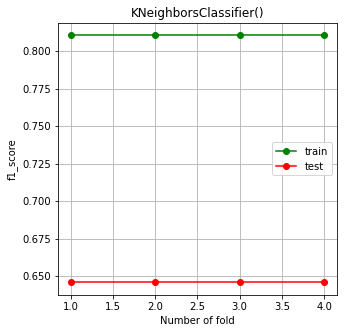

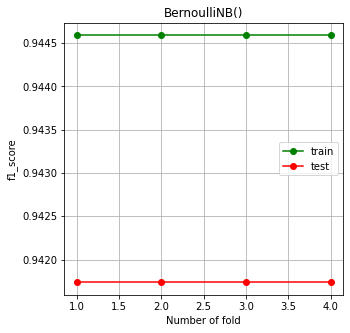

In [140]:
test_test_models(x_bal,x_test,y_bal,y_test)

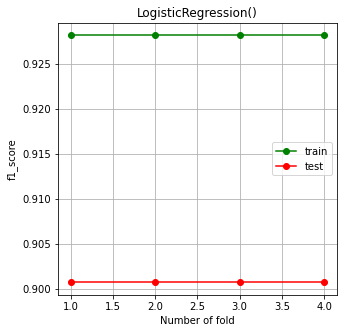

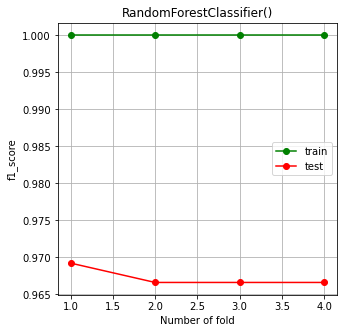

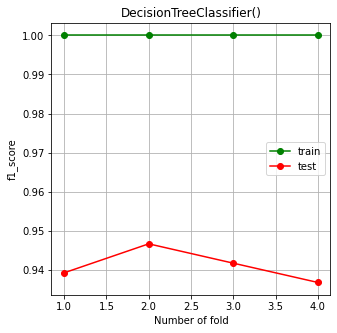

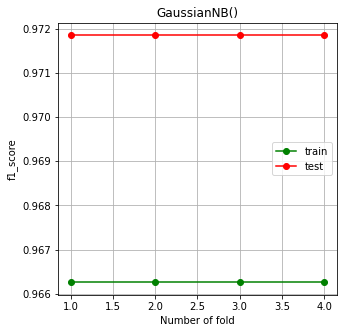

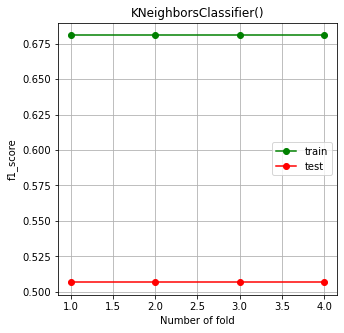

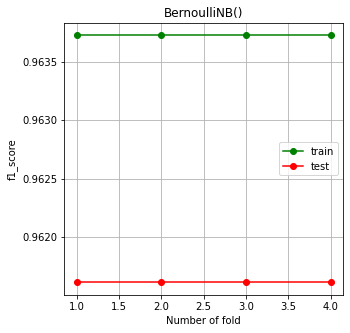

In [142]:
test_test_models(x_train_select,x_test_select,y_train_select,y_test_select)

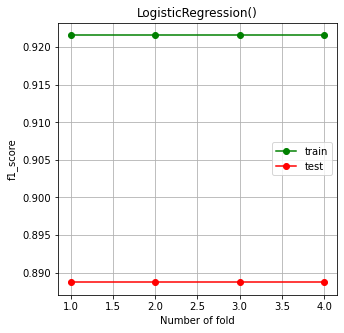

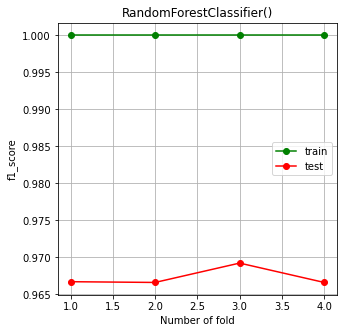

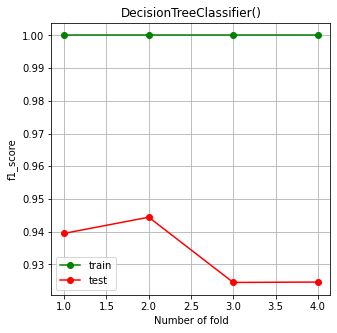

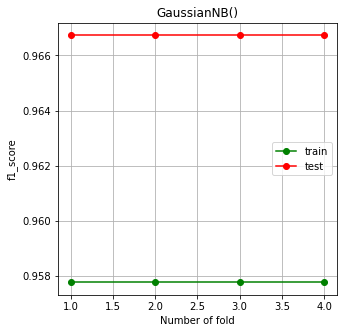

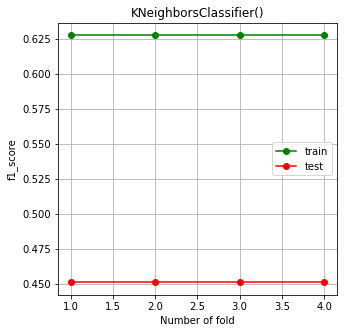

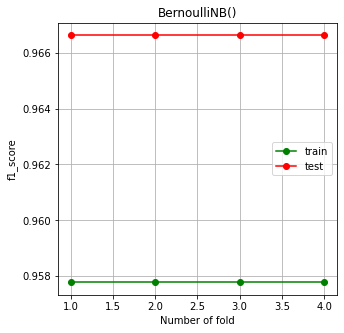

In [143]:
test_test_models(x_train_iforest_select,x_test_select,y_train_iforest_select,y_test_select)

### O lista cu modele care nu au overfitting sau underfitting, plus au si un rezultat bun

In [166]:
# bernuli initial 0.94,
# lr redus 0.97 - perfect,
# gnb redus 0.965,
# rf balansat 1,
# gnb balans final 0.962

### Deoarece la modelul de logistic regresion cu date dupa pca ,graficele pentru train si test coincid,si au cel mai bun rezultat, cream un pipeline care va avea un scaller,pca,si model

In [167]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('min_max_scaler', MinMaxScaler(feature_range =(0, 1))),
                 ('pca',PCA(n_components = 0.9)),
                 ('lr_model', LogisticRegression(random_state=42,class_weight='balanced'))
                ])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.9671717171717171

### Concatenam datasetul de lucru cu cel nul, pentru inceput vom inlocui datele nule, apoi vom prezice datele nule din target

In [168]:
x_null=null_target_data.drop('pat_vit_status',axis=1)
y_null=null_target_data['pat_vit_status']

In [169]:
x_total=pd.concat([x,x_null],axis=0)

In [170]:
object_data=x_total.select_dtypes(object)

#### transformam datele object in date de tip numeric,excluzand cele nule

In [171]:
original=object_data
mask=object_data.isnull()
object_data=object_data.astype(str).apply(lbl_enc.fit_transform)
object_data=object_data.where(~mask, original)

In [172]:
x_total=pd.concat([object_data,x_total.select_dtypes(float)],axis=1)

### Inlocuim datele nule

In [174]:
imp.fit(x_total)
x_total_imp=imp.transform(x_total)

[IterativeImputer] Completing matrix with shape (2509, 31)
[IterativeImputer] Ending imputation round 1/150, elapsed time 0.08
[IterativeImputer] Change: 423.6586198569541, scaled tolerance: 0.00038420999999999996 
[IterativeImputer] Ending imputation round 2/150, elapsed time 0.20
[IterativeImputer] Change: 82.24958817900126, scaled tolerance: 0.00038420999999999996 
[IterativeImputer] Ending imputation round 3/150, elapsed time 0.27
[IterativeImputer] Change: 26.626740787434812, scaled tolerance: 0.00038420999999999996 
[IterativeImputer] Ending imputation round 4/150, elapsed time 0.35
[IterativeImputer] Change: 19.544581062478965, scaled tolerance: 0.00038420999999999996 
[IterativeImputer] Ending imputation round 5/150, elapsed time 0.42
[IterativeImputer] Change: 15.964238310948804, scaled tolerance: 0.00038420999999999996 
[IterativeImputer] Ending imputation round 6/150, elapsed time 0.50
[IterativeImputer] Change: 13.280068255039113, scaled tolerance: 0.00038420999999999996 
[

[IterativeImputer] Ending imputation round 53/150, elapsed time 4.11
[IterativeImputer] Change: 0.029203280247582897, scaled tolerance: 0.00038420999999999996 
[IterativeImputer] Ending imputation round 54/150, elapsed time 4.20
[IterativeImputer] Change: 0.02588078497576851, scaled tolerance: 0.00038420999999999996 
[IterativeImputer] Ending imputation round 55/150, elapsed time 4.28
[IterativeImputer] Change: 0.02293585753854932, scaled tolerance: 0.00038420999999999996 
[IterativeImputer] Ending imputation round 56/150, elapsed time 4.37
[IterativeImputer] Change: 0.020325648190063994, scaled tolerance: 0.00038420999999999996 
[IterativeImputer] Ending imputation round 57/150, elapsed time 4.45
[IterativeImputer] Change: 0.01801216282543794, scaled tolerance: 0.00038420999999999996 
[IterativeImputer] Ending imputation round 58/150, elapsed time 4.52
[IterativeImputer] Change: 0.015961713624908946, scaled tolerance: 0.00038420999999999996 
[IterativeImputer] Ending imputation round 

[IterativeImputer] Ending imputation round 34/90, elapsed time 0.17
[IterativeImputer] Ending imputation round 35/90, elapsed time 0.18
[IterativeImputer] Ending imputation round 36/90, elapsed time 0.18
[IterativeImputer] Ending imputation round 37/90, elapsed time 0.19
[IterativeImputer] Ending imputation round 38/90, elapsed time 0.19
[IterativeImputer] Ending imputation round 39/90, elapsed time 0.19
[IterativeImputer] Ending imputation round 40/90, elapsed time 0.20
[IterativeImputer] Ending imputation round 41/90, elapsed time 0.20
[IterativeImputer] Ending imputation round 42/90, elapsed time 0.21
[IterativeImputer] Ending imputation round 43/90, elapsed time 0.21
[IterativeImputer] Ending imputation round 44/90, elapsed time 0.22
[IterativeImputer] Ending imputation round 45/90, elapsed time 0.22
[IterativeImputer] Ending imputation round 46/90, elapsed time 0.23
[IterativeImputer] Ending imputation round 47/90, elapsed time 0.23
[IterativeImputer] Ending imputation round 48/90

In [175]:
x_total=pd.DataFrame(data=x_total_imp,columns=x.columns)

In [176]:
x_total.isnull().sum()

surg_type                     0
cancer_type                   0
cancer_type_details           0
cellularity                   0
chemotherapy                  0
claudin-low_subtype           0
ihc_er_status                 0
er_status                     0
her2_snp6                     0
her2_status                   0
othr_histologic_sbt           0
hormone_thrp                  0
menopausal_state              0
integrative_cluster           0
prim_tmr_ltrl                 0
oncotree_code                 0
overall_surv_stat             0
pr_status                     0
radio_thrp                    0
relapse_free_status           0
3gene_class_sbtype            0
diag_age                      0
cohort                        0
neoplasm_gr                   0
pos_lymph_nodes               0
mut_count                     0
nothing_progn_id              0
overall_surv_m                0
relapse_free_status_months    0
tum_size                      0
tum_stage                     0
dtype: i

### Scalam datele pentru pca

In [177]:
x_total_rescaled = min_max_scaler.fit_transform(x_total)  
pca=PCA(n_components=0.9)
pca.fit(x_total_rescaled)
reduced_total = pca.transform(x_total_rescaled)

In [178]:
reduced_total.shape

(2509, 13)

### la primul pca am obtinut 15 coloane,la aceeasi valoare,0.9,plus ca nu stim ce coloane sunt selectate,asa ca nu vom folosi lr_model pe date reduse care a avut cele mai bune rezultate

In [194]:
rf_model=RandomForestClassifier(class_weight='balanced')
rf_model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [195]:
y_pred_null = rf_model.predict(x_total.iloc[-529:])

In [196]:
np.count_nonzero(y_pred_null == 1)

0

In [197]:
np.count_nonzero(y_pred_null == 0)

102

In [198]:
np.count_nonzero(y_pred_null == 2)

427

In [199]:
bnb_model=BernoulliNB()
bnb_model.fit(x_train,y_train)
y_pred_null = bnb_model.predict(x_total.iloc[-529:])

In [200]:
for i in range(3):
    print(np.count_nonzero(y_pred_null == i))

2
0
527


### in urma predictiei,putem sa ne cream 2 concluzii,ca modelul nu a prezis corect, insa am mai verificat si pe LR si pe BNB,si rezultatele erau aproximativ asemanatoare doar prin faptul ca mereu numarul persoanelor supravietuite e mai mare,sial 2-lea lucru este ca datele care lipsesc sunt a persoanelor care au murit din alte cauze(la modelul de rf,deoarece este cel mai diversificat),acest lucru ne poate spune ca datele lor nu au fost actualizate,din partea oncologiei nu au stiut despre deces,sau invers,la constatarea decesului nu s-a stiut despre istoricul oncologic,si ramanand datele nule, si persoane care inca traiesc,fapt care ne poate induce la gandul ca nu s-au mai prezentat la spital,sau urma sa se prezinte ? )))
### dar totusi ramanem la modelul de RF deoarece el se arata cel mai bine pe subseturi cu mai multe date,plus ca sunt un pic mai balansate

In [201]:
y_pred_null=pd.Series(data=y_pred_null)

In [202]:
y_total=pd.concat([y,y_pred_null],axis=0)

In [203]:
x_total.shape

(2509, 31)

In [204]:
y_total.shape

(2509,)

In [205]:
y_total=pd.DataFrame(data=y_total,columns=['pat_vit_status'])

In [206]:

data_total=x_total.join(y_total, how='outer')

In [207]:
x_train_total,x_test_total,y_train_total,y_test_total=train_test_split(x_total,y_total,test_size=0.2,random_state=42)


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       145
           1       0.50      0.45      0.47        80
           2       0.82      0.84      0.83       277

    accuracy                           0.74       502
   macro avg       0.67      0.66      0.67       502
weighted avg       0.73      0.74      0.74       502


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       145
           1       1.00      0.86      0.93        80
           2       1.00      1.00      1.00       277

    accuracy                           0.98       502
   macro avg       0.98      0.95      0.96       502
weighted avg       0.98      0.98      0.98       502


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       145
           1       

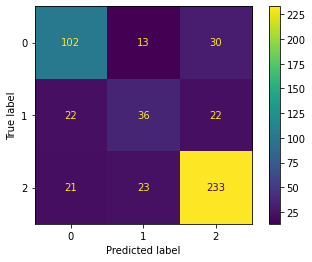

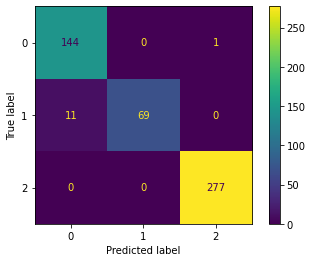

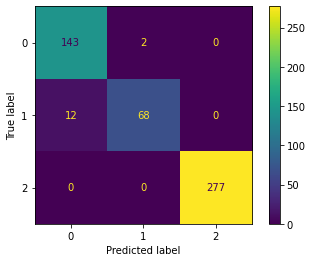

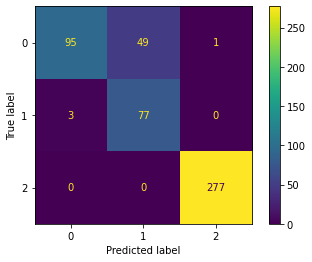

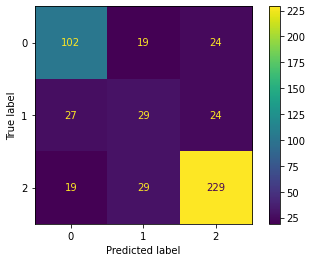

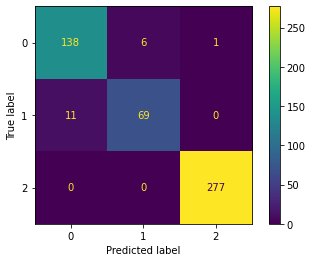

In [208]:
model_list_train(x_train_total,x_test_total,y_train_total,y_test_total,confusion='confusion')

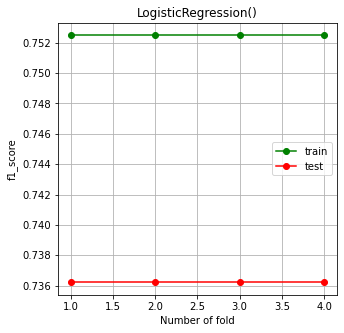

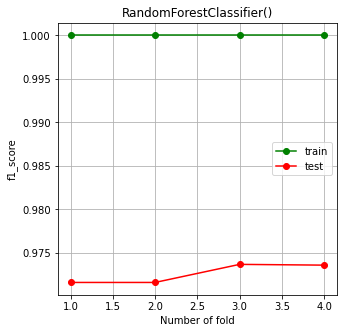

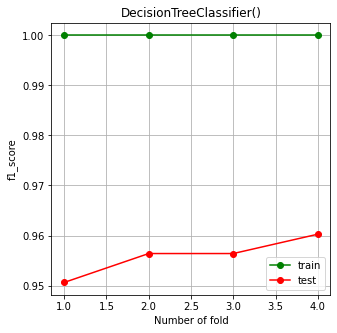

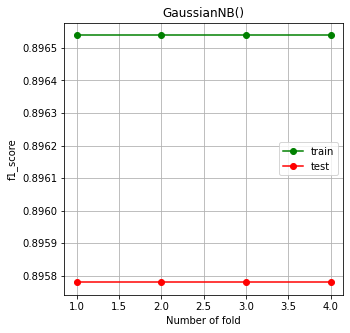

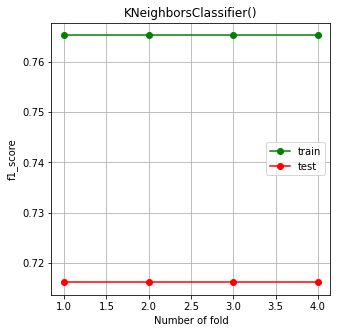

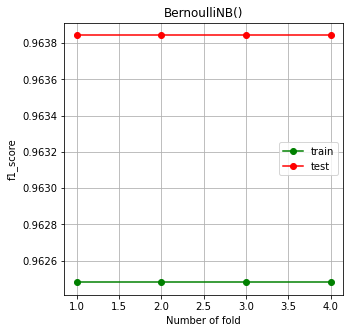

In [209]:
test_test_models(x_train_total,x_test_total,y_train_total,y_test_total)

### BNB are cele mai bune rezultate
### Balansam datele

In [210]:
x_bal_tot,y_bal_tot=smk.fit_resample(x_train_total ,y_train_total)


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       145
           1       0.45      0.68      0.54        80
           2       0.88      0.71      0.79       277

    accuracy                           0.71       502
   macro avg       0.67      0.70      0.67       502
weighted avg       0.75      0.71      0.72       502


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       145
           1       1.00      0.86      0.93        80
           2       1.00      1.00      1.00       277

    accuracy                           0.98       502
   macro avg       0.98      0.95      0.96       502
weighted avg       0.98      0.98      0.98       502


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       145
           1       

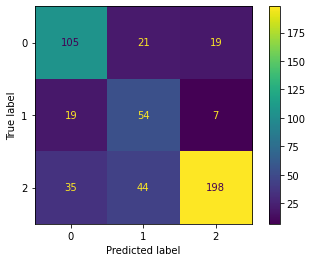

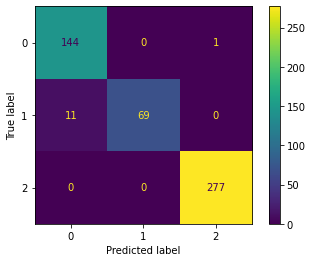

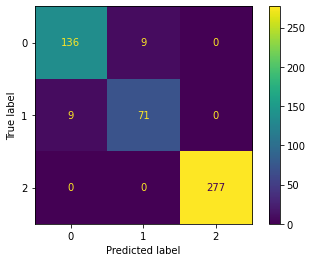

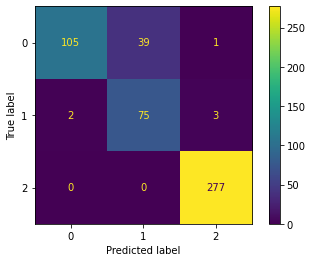

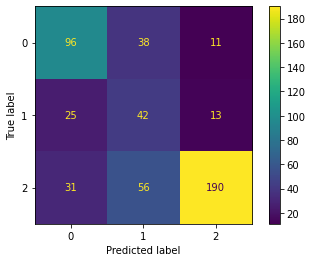

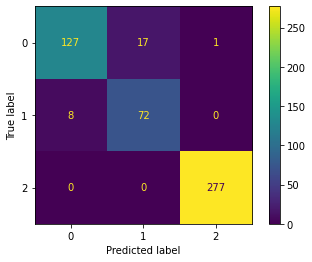

In [211]:
model_list_train(x_bal_tot,x_test_total,y_bal_tot,y_test_total,confusion='confusion')

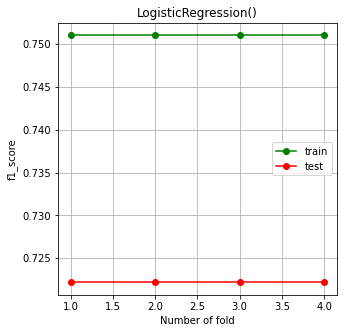

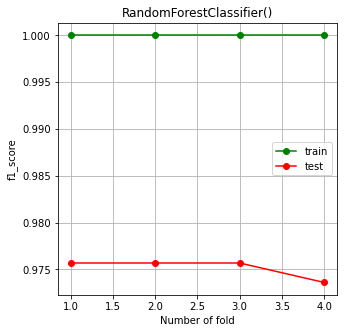

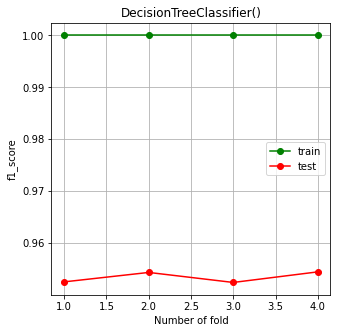

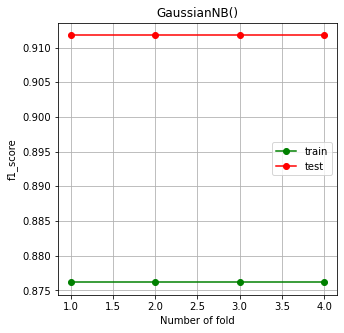

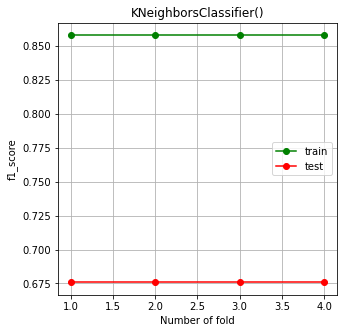

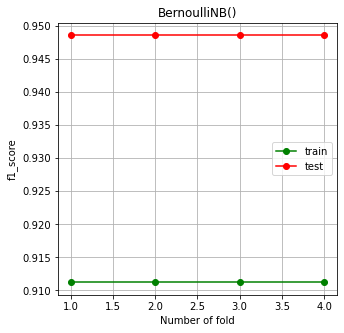

In [212]:
test_test_models(x_bal_tot,x_test_total,y_bal_tot,y_test_total)

### Datele fara balansare au avut rezultate mai bune

In [213]:
pipe.fit(x_train_total, y_train_total)
pipe.score(x_test_total, y_test_total)

0.8625498007968128

In [214]:
pipe2 = Pipeline([('min_max_scaler', MinMaxScaler(feature_range =(0, 1))),
                 ('pca',PCA(n_components = 0.9)),
                 ('bnb_model', BernoulliNB())
                ])
pipe2.fit(x_train, y_train)
pipe2.score(x_test, y_test)

0.9065656565656566

<AxesSubplot:>

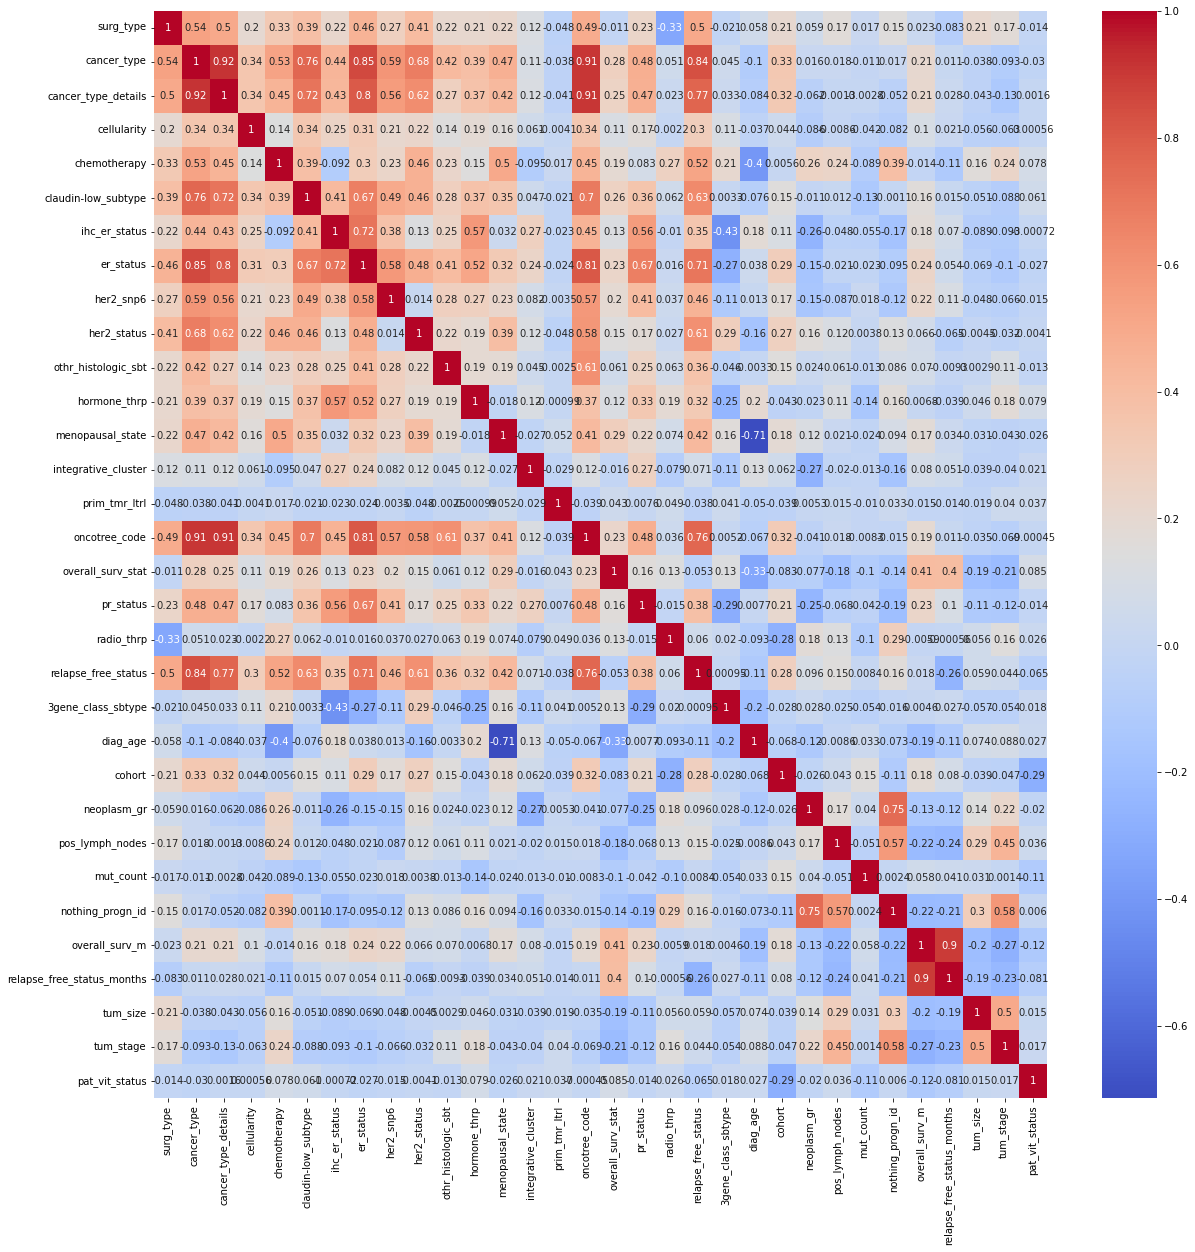

In [216]:
plt.figure(figsize=(20,20))
sns.heatmap(data_total.corr(),annot=True,cmap='coolwarm')

In [276]:
f1_selection=[]
for i in range(3,10):
    f1_selection.append(column_selection(bnb_model,i,data_total))

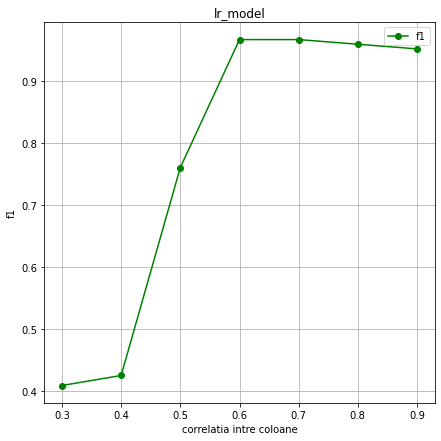

In [277]:
 plt.figure(figsize=(7,7))
x_plot = [x / 10.0 for x in range(3, 10)]
plt.plot(x_plot, f1_selection, 'o-', color='green', label='f1')

plt.legend()
plt.grid()
plt.title("lr_model")
plt.xlabel('correlatia intre coloane')
plt.ylabel('f1')
plt.show()

In [284]:
same_columns=[]
#comparam toate coloanele din datasetul de lucru
working_data=data_total
for i in range(len(working_data.columns)):
    #print (working_data.columns[i])
    for j in range(i+1,len(working_data.columns)):
        if abs(working_data[working_data.columns[i]].corr(working_data[working_data.columns[j]]))>0.7 :
            if (working_data.columns[i] not in same_columns) or (working_data.columns[j] not in same_columns):
                # verificam daca nici una dintre aceste 2 coloane nu a fost selectata deja
                
                #verificam care coloana are corelatia mai buna cu y si o selectam pe cea cu valoarea mai mica
                if abs(working_data[working_data.columns[i]].corr(working_data[working_data.columns[-1]]))< abs(working_data[working_data.columns[j]].corr(working_data[working_data.columns[-1]])):
                    #selectam coloana 
                    same_columns.append(working_data.columns[i])
                else:                                                                                                                            

                    same_columns.append(working_data.columns[j])
same_columns=[*set(same_columns)]

In [285]:
x_select=x_total.drop(same_columns,axis=1)
x_train_select_tot,x_test_select_tot,y_train_select_tot,y_test_select_tot=train_test_split(x_select,y_total,test_size=0.2,random_state=42)


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.75      0.68      0.71       145
           1       0.67      0.62      0.65        80
           2       0.84      0.90      0.87       277

    accuracy                           0.79       502
   macro avg       0.75      0.73      0.74       502
weighted avg       0.78      0.79      0.79       502


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       145
           1       1.00      0.85      0.92        80
           2       1.00      1.00      1.00       277

    accuracy                           0.97       502
   macro avg       0.97      0.95      0.96       502
weighted avg       0.98      0.97      0.97       502


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       145
           1       

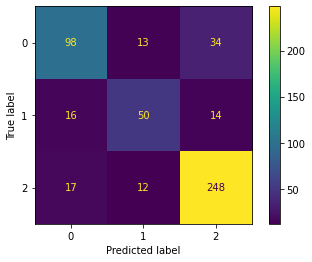

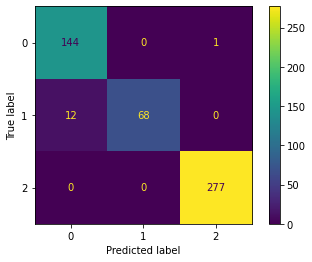

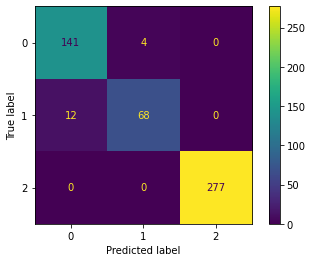

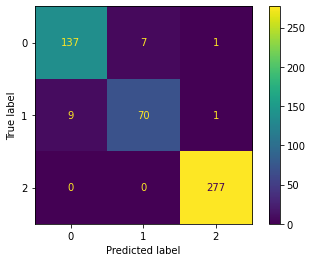

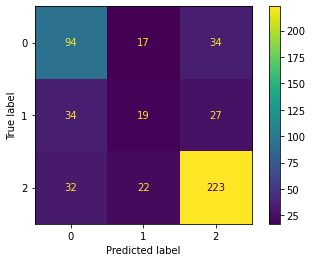

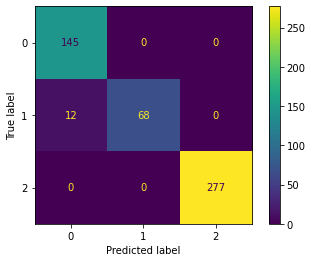

In [286]:
model_list_train(x_train_select_tot,x_test_select_tot,y_train_select_tot,y_test_select_tot,confusion='confusion')

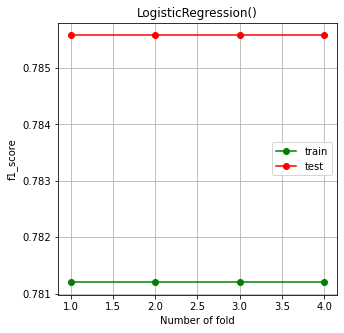

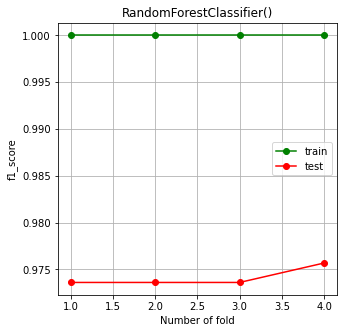

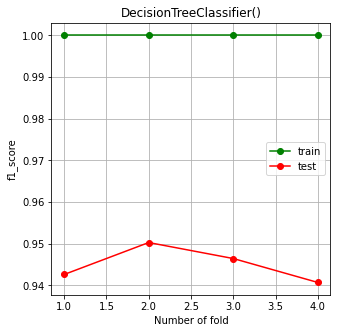

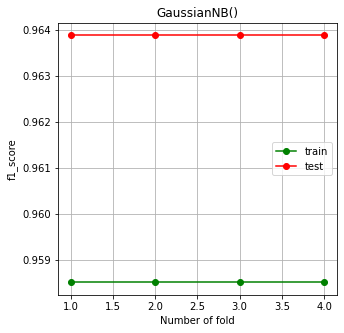

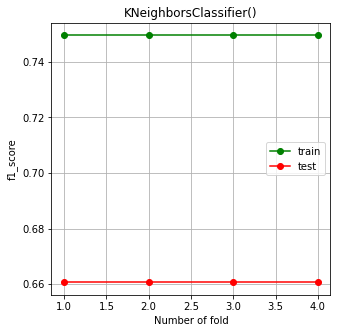

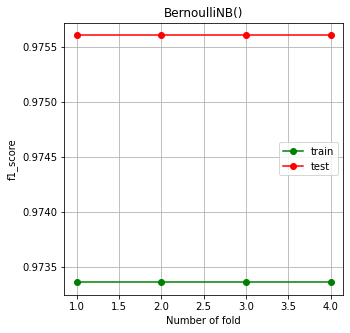

In [287]:
test_test_models(x_train_select_tot,x_test_select_tot,y_train_select_tot,y_test_select_tot)

In [288]:
x_bal,y_bal=smk.fit_resample(x_train_select_tot,y_train_select_tot)


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.72      0.71      0.72       145
           1       0.53      0.70      0.60        80
           2       0.85      0.77      0.81       277

    accuracy                           0.74       502
   macro avg       0.70      0.73      0.71       502
weighted avg       0.76      0.74      0.75       502


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       145
           1       1.00      0.85      0.92        80
           2       1.00      1.00      1.00       277

    accuracy                           0.97       502
   macro avg       0.97      0.95      0.96       502
weighted avg       0.98      0.97      0.97       502


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       145
           1       

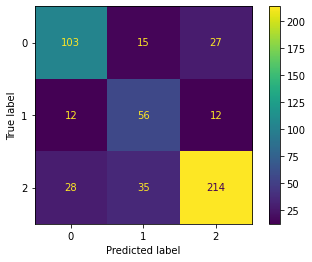

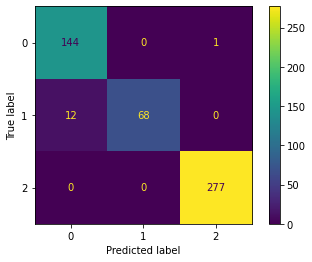

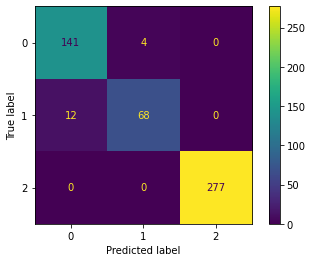

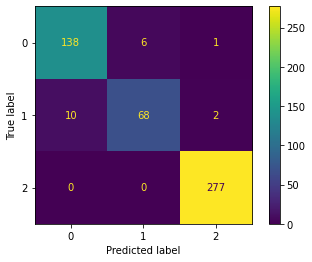

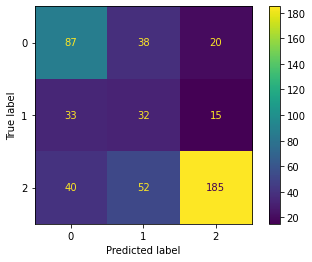

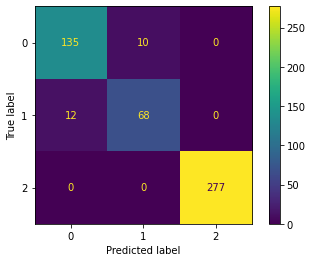

In [289]:
model_list_train(x_bal,x_test_select_tot,y_bal,y_test_select_tot,confusion='confusion')

In [290]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=12)

In [291]:
x_bal,y_bal=sm.fit_resample(x_train_select_tot,y_train_select_tot)


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.69      0.71      0.70       145
           1       0.52      0.74      0.61        80
           2       0.88      0.76      0.82       277

    accuracy                           0.74       502
   macro avg       0.70      0.74      0.71       502
weighted avg       0.77      0.74      0.75       502


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       145
           1       1.00      0.85      0.92        80
           2       1.00      1.00      1.00       277

    accuracy                           0.98       502
   macro avg       0.97      0.95      0.96       502
weighted avg       0.98      0.98      0.98       502


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       145
           1       

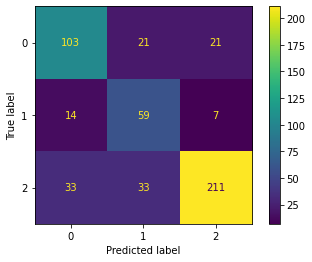

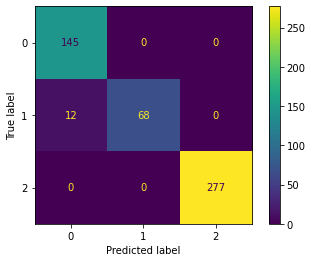

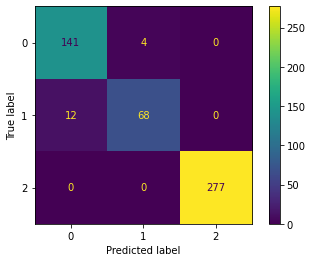

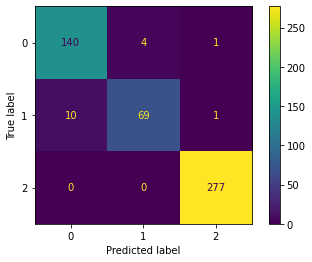

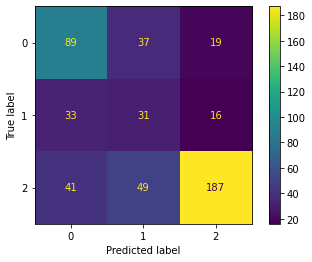

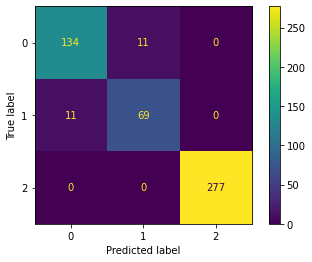

In [292]:
model_list_train(x_bal,x_test_select_tot,y_bal,y_test_select_tot,confusion='confusion')

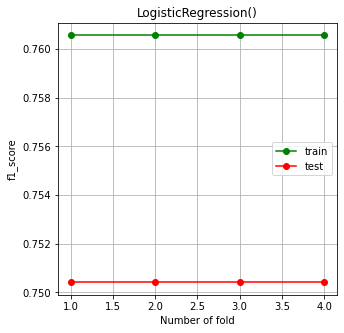

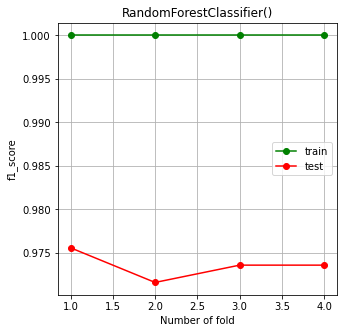

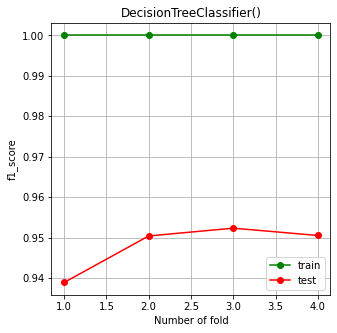

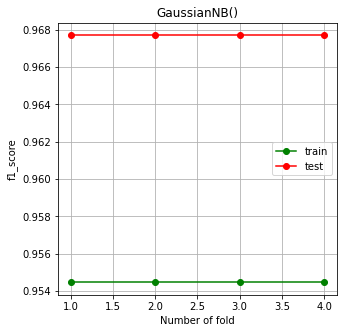

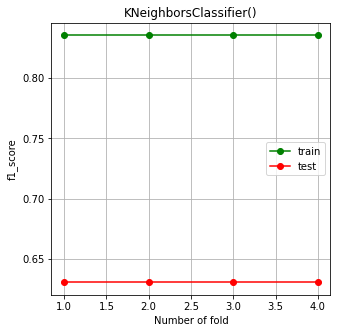

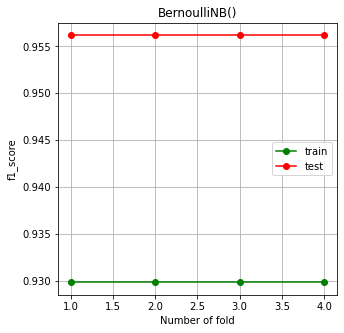

In [293]:
test_test_models(x_bal,x_test_select_tot,y_bal,y_test_select_tot)

In [306]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler() 
# resampling X, y
x_rus, y_rus = rus.fit_resample(x_train_select_tot,y_train_select_tot)


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       145
           1       0.51      0.72      0.60        80
           2       0.87      0.76      0.81       277

    accuracy                           0.74       502
   macro avg       0.69      0.73      0.70       502
weighted avg       0.76      0.74      0.75       502


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       145
           1       1.00      0.85      0.92        80
           2       1.00      1.00      1.00       277

    accuracy                           0.98       502
   macro avg       0.97      0.95      0.96       502
weighted avg       0.98      0.98      0.98       502


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       145
           1       

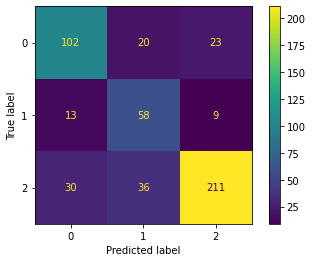

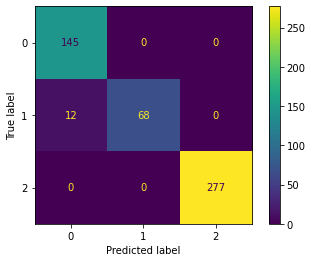

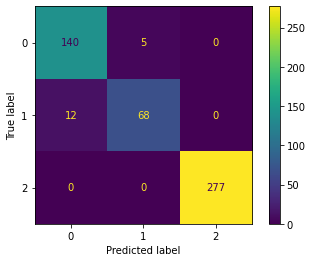

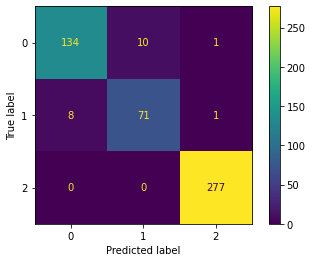

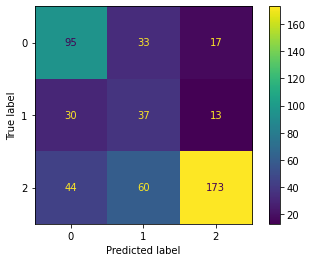

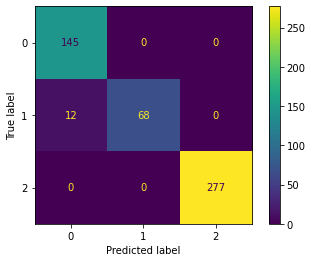

In [307]:
model_list_train(x_rus,x_test_select_tot,y_rus,y_test_select_tot,confusion='confusion')

In [308]:
x_rus, y_rus = rus.fit_resample(x_bal,y_bal)


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.69      0.71      0.70       145
           1       0.52      0.74      0.61        80
           2       0.88      0.76      0.82       277

    accuracy                           0.74       502
   macro avg       0.70      0.74      0.71       502
weighted avg       0.77      0.74      0.75       502


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       145
           1       1.00      0.85      0.92        80
           2       1.00      1.00      1.00       277

    accuracy                           0.97       502
   macro avg       0.97      0.95      0.96       502
weighted avg       0.98      0.97      0.97       502


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       145
           1       

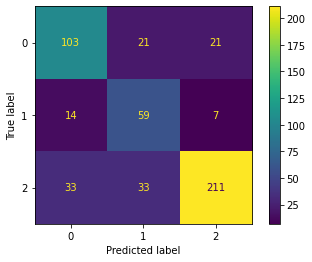

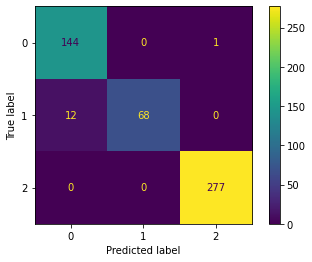

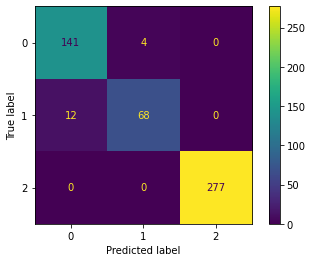

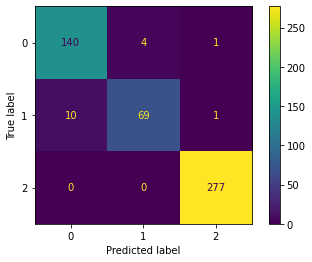

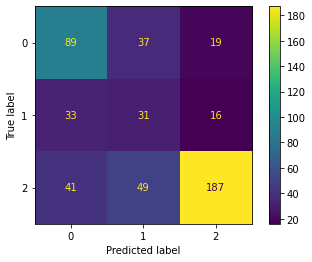

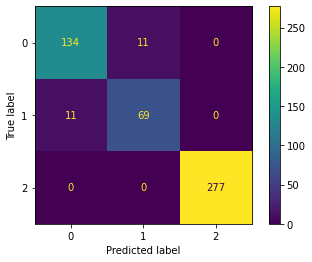

In [309]:
model_list_train(x_rus,x_test_select_tot,y_rus,y_test_select_tot,confusion='confusion')

In [318]:
x_bal,y_bal=sm.fit_resample(x_train_select_tot,y_train_select_tot)
for i in range(20):
    #x_rus, y_rus = rus.fit_resample(x_bal,y_bal)
    x_bal,y_bal=sm.fit_resample(x_bal,y_bal)


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.69      0.71      0.70       145
           1       0.52      0.74      0.61        80
           2       0.88      0.76      0.82       277

    accuracy                           0.74       502
   macro avg       0.70      0.74      0.71       502
weighted avg       0.77      0.74      0.75       502


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       145
           1       1.00      0.85      0.92        80
           2       1.00      1.00      1.00       277

    accuracy                           0.97       502
   macro avg       0.97      0.95      0.96       502
weighted avg       0.98      0.97      0.97       502


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       145
           1       

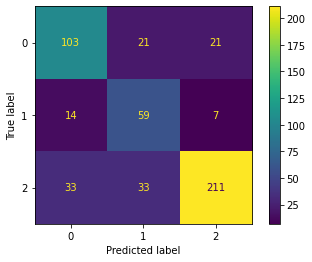

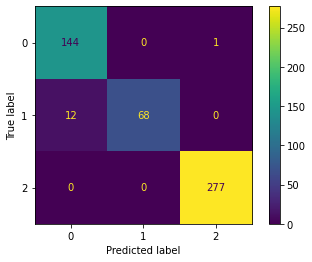

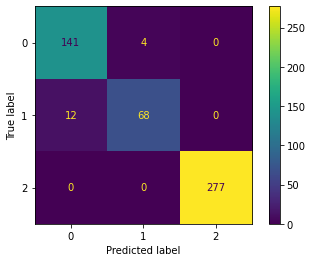

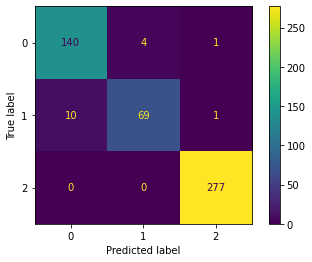

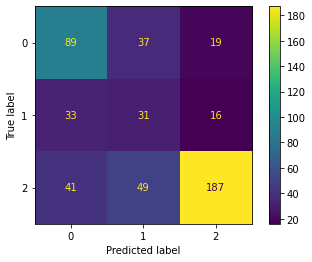

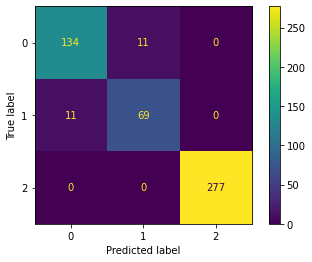

In [319]:
model_list_train(x_rus,x_test_select_tot,y_rus,y_test_select_tot,confusion='confusion')

### Observam rezultate nesemnificativa dupa balansare,dar oricum,ramanem la Naive Bias,luand in considerare si ultimele confussion matrixuri, GNB are rezultate mai bune

### Cel mai bun rezultat il are GNB, cu un f1_scor mediu de 0.94, si cu cea mai mica diferenta intre train si vaidation f1_score,si chiar daca la rf scorul este mai mare, alegem bernoulliNB deoarece f1_score de test este mai mare ca f1_score de train,fapt ce ne arata ca este underfit,dar in cazul nostru aceasta diferenta este prea mica,fapt ce ne indica ca modelul este antrenat bine, si cred ca am realizat un lucru bun obtinand un f1_score de 0.94 la un dataset unde lipseau aproximativ 1/5 date din coloana de target plus ca in acelasi interval mai lipseau datele din 15 coloane din X